In [ ]:
# Install Dependencies
!pip install simpletransformers
!pip install swifter
!pip install nlp-id

In [ ]:
# Mount Google Drive
from google.colab import drive
drive._mount('/content/drive')

Mounted at /content/drive


# Data selection
In this section, we conducted a stratified data sampling to obtain 10,000 data for training and testing

## Import Data

In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/alodokter_final.csv", index_col=0)
df.head()

,user,title,question,question_date,answer,answer_date,doctor,topic_url,topics,topic_set,risk,year,time_to_answer
0,Yevie Nabella Afandi,Khasiat obat zinc sulphate,Dok saya mau tanya Anak saya kan kenak fimosis...,"23 September 2017, 18:50","Hai Yevie, Terima kasih atas pertanyaannya. Zi...","24 September 2017, 10:42",dr. Annes Waren,https://www.alodokter.com/komunitas/topic-tag/...,zinc-sulphate,zinc-sulphate,low,2017,0.0
1,pendys,Perbedaan jenis formula zinc,siang dokter.... dokter sayang ingin bertanya ...,"5 August 2017, 12:16","Halo Pendys, Zinc merupakan salah satu minera...","5 August 2017, 16:27",dr. Aloisia Permata Sari,https://www.alodokter.com/komunitas/topic-tag/...,zinc-sulphate,zinc-sulphate,low,2017,0.0
2,IriSh FairiSh,Mengkonsumsi suplemen zinc yang sudah kadaluarsa,"Malam dok, saya baru menemukan suplemen zinc s...","12 December 2018, 20:54","Hai IriSh, Terimakasih telah bertanya ke Alodo...","13 December 2018, 17:08",dr. Nadia Nurotul Fuadah,https://www.alodokter.com/komunitas/topic-tag/...,suplemen zinc-sulphate,zinc-sulphate,low,2018,0.0
3,dwifebiola,Keamanan konsumsi suplemen zinc saat program h...,"Dear dokter, Umur saya 24 tahun dan baru menik...","7 January 2019, 15:09","Selamat pagi, terimakasih atas pertanyaannya S...","8 January 2019, 09:32",dr. Farah Nabilla,https://www.alodokter.com/komunitas/topic-tag/...,suplemen zinc-sulphate,zinc-sulphate,low,2019,0.0
4,Lusiya,Suplemen apa yang banyak mengandung zinc.,Sakit flu tak kunjung sembuh disebabkan karena...,"30 March 2019, 06:05","Selamat malam, terimakasih atas pertanyaannya ...","30 March 2019, 20:25",dr. Farah Nabilla,https://www.alodokter.com/komunitas/topic-tag/...,suplemen zinc-sulphate,zinc-sulphate,low,2019,0.0


In [ ]:
df['labels_num'] = df.topics.apply(lambda x: len(x.split(" ")))
df.labels_num.value_counts()

2     242451
1     159513
3      72769
4      11702
5       6456
6       3206
7       1268
8        434
9        115
10        37
12         8
11         6
21         5
13         4
Name: labels_num, dtype: int64

In [ ]:
# df_labels = df.loc[df.labels_num == 5]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Number of Data')

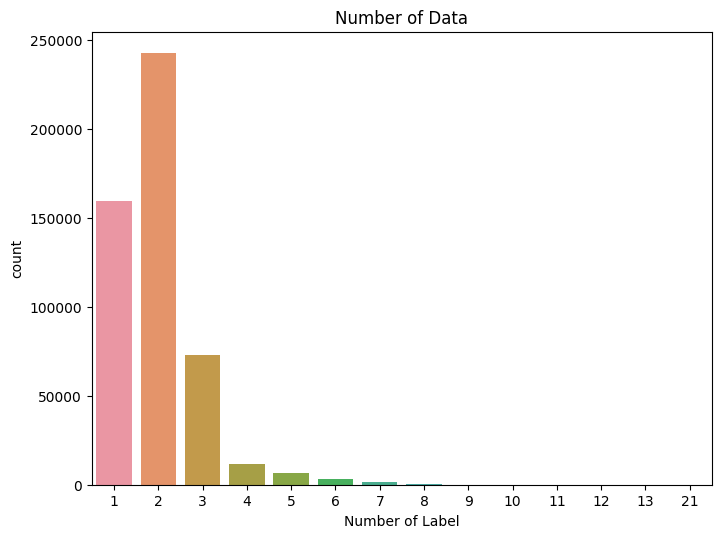

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=100)
sns.countplot(df.labels_num)
plt.xlabel('Number of Label')
plt.title('Number of Data')

## Data cleaning

In [ ]:
# import re
# df_labels.answer = df_labels.answer.apply(lambda x: re.sub(' +', ' ', x))

## Tag mapping

In [ ]:
from collections import Counter
import numpy as np

labels = []
for _, topics in df.iterrows():
    labels += topics.topics.split(" ")
    
labels_occurance = Counter(labels)
labels_occurance.most_common()[:15]

[('menstruasi', 31653),
 ('kehamilan', 27661),
 ('obat', 21281),
 ('asam-lambung', 17063),
 ('bayi', 15485),
 ('sakit-kepala', 11724),
 ('benjolan', 11179),
 ('kulit', 10995),
 ('alergi', 10857),
 ('kontrasepsi', 10841),
 ('nutrisi', 10480),
 ('infeksi-saluran-kemih', 10142),
 ('infeksi-jamur', 9931),
 ('anak', 9759),
 ('tuberkulosis', 9720)]

In [ ]:
labels = [
    l[0] for l in labels_occurance.most_common()[:10]
]
total_labels = len(labels)
labels

['menstruasi',
 'kehamilan',
 'obat',
 'asam-lambung',
 'bayi',
 'sakit-kepala',
 'benjolan',
 'kulit',
 'alergi',
 'kontrasepsi']

In [ ]:
label2idx = {k: v for v, k in enumerate(labels)}
idx2label = {v: k for v, k in enumerate(labels)}
label2idx

{'alergi': 8,
 'asam-lambung': 3,
 'bayi': 4,
 'benjolan': 6,
 'kehamilan': 1,
 'kontrasepsi': 9,
 'kulit': 7,
 'menstruasi': 0,
 'obat': 2,
 'sakit-kepala': 5}

In [ ]:
idx2label

{0: 'menstruasi',
 1: 'kehamilan',
 2: 'obat',
 3: 'asam-lambung',
 4: 'bayi',
 5: 'sakit-kepala',
 6: 'benjolan',
 7: 'kulit',
 8: 'alergi',
 9: 'kontrasepsi'}

In [ ]:
def mapping(x):
    hashtable = []
    for i in label2idx:
        if i in x:
            hashtable.append(1)
        else:
            hashtable.append(0)
    return hashtable

df['labelmap'] = df.topics.apply(lambda x: mapping(x))
df['selected'] = df.labelmap.apply(lambda x: np.sum(x) > 0)
df = df.loc[df.selected]
df

,user,title,question,question_date,answer,answer_date,doctor,topic_url,topics,topic_set,risk,year,time_to_answer,labels_num,labelmap,selected
6,Well Chici,Konsumsi zinc pada penderita asam lambung,Dok...saya punya riwayat asam lambung...boleh ...,"19 November 2019, 23:47","Alo Weli, Terimakasih atas pertanyaannya. Zink...","20 November 2019, 13:44",dr. Nadia Nurotul Fuadah,https://www.alodokter.com/komunitas/topic-tag/...,suplemen asam-lambung zinc-sulphate,zinc-sulphate,low,2019,0.0,3,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]",True
7,Marusli8765,Tata cara dalam konsumsi Zinc sulphate,"Pagi, Dok...Saya mendapat informasi dari terap...","2 August 2019, 07:05","Alo Marusli, Zinc merupakan salah satu minera...","2 August 2019, 10:18",dr. Devika Yuldharia,https://www.alodokter.com/komunitas/topic-tag/...,diare obat zinc-sulphate,zinc-sulphate,low,2019,0.0,3,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]",True
8,Hani Oktaviani,Penggunaan zinc untuk bayi usia 1 bulan,"Mlm dok, sy ingin konsul anak saya usia nya 1 ...","15 October 2018, 23:12","Halo Hani, Zink merupakan mineral yang juga d...","17 October 2018, 08:32",dr. Saphira Evani,https://www.alodokter.com/komunitas/topic-tag/...,bayi zinc-sulphate,zinc-sulphate,low,2018,1.0,2,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0]",True
12,Izha Rin,Dampak jika salah aturan konsumsi minum obat,Selamat malam dok. saya mau tanya. ibu saya tg...,"12 February 2021, 20:40","Selamat malam, terima kasih telah bertanya di ...","12 February 2021, 22:44",dr. Amadeo Drian Basfiansa,https://www.alodokter.com/komunitas/topic-tag/...,obat zat-kimia,zat-kimia,low,2021,0.0,2,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]",True
16,Fitriani Widyo Putri,Perhitungan hari pemberian dosis zinc untuk ba...,Bagaimana perhitungan 10 hari dalam mengonsums...,"26 March 2020, 07:57","Alo Fitriani, Zinc dapat membantu dalam penan...","26 March 2020, 13:57",dr. Devika Yuldharia,https://www.alodokter.com/komunitas/topic-tag/...,bayi diare zinc-sulphate,zinc-sulphate,low,2020,0.0,3,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0]",True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259853,Marini Septi Rosiana W,Mekanisme kerja obat N-acetylcysisteine.,Dok saya mau bertanya. bagaimana mekanisme ker...,"9 February 2019, 20:03",Alo Marini ! Terima kasih atas pertanyaannya d...,"10 February 2019, 01:06",dr. Arya Pradipa Adrianto Putra,https://www.alodokter.com/komunitas/topic-tag/...,obat acetylcysteine,acetylcysteine,low,2019,0.0,2,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]",True
259938,Aeniie Jr.,Efek samping obat pada pasien sakit paru-paru,"Selamat malam dok, saya mau bertanya..Bapak sa...","23 March 2019, 19:16","Selamat siang, terimakasih atas pertanyaannya ...","24 March 2019, 11:35",dr. Farah Nabilla,https://www.alodokter.com/komunitas/topic-tag/...,obat abses-paru,abses-paru,low,2019,0.0,2,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]",True
259948,Suna,"Pemberian obat untuk anak yang sakit gigi, gus...",Dok saya mau tanya anak saya sakit gigi gusi b...,"13 December 2020, 23:19","Alo, terimakasih atas pertanyaannya. Abses gig...","14 December 2020, 09:59",dr. Nadia Nurotul Fuadah,https://www.alodokter.com/komunitas/topic-tag/...,sakit-gigi obat abses-gigi,abses-gigi,low,2020,0.0,3,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]",True
259971,Sienna,Obat yang dapat digunakan untuk mengatasi abse...,"Dok, sblumnya gigi depan saya ngilu dan bengka...","20 August 2020, 23:59","Alo, Obat yang Anda sebutkan mengandung kaliu...","21 August 2020, 09:13",dr. Devika Yuldharia,https://www.alodokter.com/komunitas/topic-tag/...,obat abses-gigi,abses-gigi,low,2020,0.0,2,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]",True


## Data Sampling

In [ ]:
from sklearn.model_selection import train_test_split
selected_data, _ = train_test_split(df, train_size=10000, stratify=df['labels_num'], random_state=42)
selected_data = selected_data.reset_index(drop=True)

In [ ]:
import ast
jml_label = []
for i, row in selected_data.iterrows():
  jml_label.append(selected_data.iloc[i]['labelmap'].count(1))
selected_data['jumlah_label'] = jml_label

In [ ]:
selected_data.year.value_counts()

2017    2453
2020    1665
2019    1586
2016    1459
2015    1338
2018    1241
2021     252
2014       6
Name: year, dtype: int64

In [ ]:
a = selected_data[selected_data['jumlah_label']>1]
a[a['topics'].str.contains('kehamilan menstruasi', regex=True)]

,user,title,question,question_date,answer,answer_date,doctor,topic_url,topics,topic_set,risk,year,time_to_answer,labels_num,labelmap,selected,jumlah_label
3,Heni Suryani,terlambat datang bulan,"Hallo dok,saya tidak biasanya telat haid tp se...","3 October 2015, 15:53","Halo, Terlambatnya siklus menstruasi bisa di...","5 October 2015, 11:08",dr. Yusi Capriyanti,https://www.alodokter.com/komunitas/topic-tag/...,kehamilan menstruasi stres,stres,low,2015,1.0,3,"[1, 1, 0, 0, 0, 0, 0, 0, 0, 0]",True,2
25,andriani,Apakah ada kemungkinan hamil?,"Dok, Apakah ada kemungkinan hamil meskipun tdk...","22 August 2015, 21:22","Halo, Tanda kehamilan yang paling mudah diket...","24 August 2015, 12:19",dr. Tessi Ananditya,https://www.alodokter.com/komunitas/topic-tag/...,kehamilan menstruasi merencanakan-kehamilan,merencanakan-kehamilan,low,2015,1.0,3,"[1, 1, 0, 0, 0, 0, 0, 0, 0, 0]",True,2
26,Eka,Bisakah hamil jika jarang haid? Dan apa tandanya?,Slamat sore dokter ..dok uda 2 hari badan sy l...,"12 March 2020, 14:42","Alo Eka, terimakasih sudah bertanya ke Alodokt...","12 March 2020, 17:43",dr.Rio Gasa Handriyo,https://www.alodokter.com/komunitas/topic-tag/...,kehamilan menstruasi,menstruasi,low,2020,0.0,2,"[1, 1, 0, 0, 0, 0, 0, 0, 0, 0]",True,2
252,Tria Ayu Lestari,Tidak menstruasi selama hampir dua bulan,"ass dok,saya wanita berumur 21 thn saya mau ta...","14 January 2016, 16:30","Hai,Menstruasi merupakan keadaan alami yang ha...","14 January 2016, 21:27",dr. Yosephine. S.,https://www.alodokter.com/komunitas/topic-tag/...,kehamilan menstruasi stres,stres,low,2016,0.0,3,"[1, 1, 0, 0, 0, 0, 0, 0, 0, 0]",True,2
511,Alifiani Al Bughori,Telat menstruasi tapi hasil test pack negatif,siang dok. saya mau tanya tntang kehamilan dok...,"13 December 2015, 10:42","Hai,Menstruasi yang terlambat tidak selalu dis...","16 December 2015, 08:37",Dr. Jessica Winoto,https://www.alodokter.com/komunitas/topic-tag/...,kehamilan menstruasi,menstruasi,low,2015,2.0,2,"[1, 1, 0, 0, 0, 0, 0, 0, 0, 0]",True,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9532,Berlian Maulin,"Terlambat menstruasi, tubuh terasa hangat, ser...",Hallo dok saya ingin bertanya bulan juli saya ...,"18 August 2020, 08:02","Alo, terimakasih atas pertanyaannya. Terlambat...","18 August 2020, 11:27",dr. Nadia Nurotul Fuadah,https://www.alodokter.com/komunitas/topic-tag/...,kehamilan menstruasi,menstruasi,low,2020,0.0,2,"[1, 1, 0, 0, 0, 0, 0, 0, 0, 0]",True,2
9653,Aida Nur Budi,Telat haid dan keputihan,Sore dok. Apa keputihan juga tanda\ hamil. Soa...,"12 December 2015, 14:42","Halo, Tidak. Keputihan bukanlah gejala kehamil...","15 December 2015, 10:04",dr. Yusi Capriyanti,https://www.alodokter.com/komunitas/topic-tag/...,kehamilan menstruasi keputihan,keputihan,low,2015,2.0,3,"[1, 1, 0, 0, 0, 0, 0, 0, 0, 0]",True,2
9678,MamEnt To Coituz,telat menstruasi selama satu minggu,"ass..dok,saya sofi usia 21 thn. saya menikah s...","11 March 2016, 06:33","Halo, Terlambat menstruasi bisa disebabkan o...","11 March 2016, 19:36",dr. Yusi Capriyanti,https://www.alodokter.com/komunitas/topic-tag/...,kehamilan menstruasi,menstruasi,low,2016,0.0,2,"[1, 1, 0, 0, 0, 0, 0, 0, 0, 0]",True,2
9844,Molly,Hasil pemeriksaan testpack yang berubah-ubah d...,"Hallo dok,saya mau nanya,pada awal saya sudah ...","17 July 2020, 11:18","Hai Molly, Tidak mengalami menstruasi dan mend...","17 July 2020, 14:02",dr. Budiono,https://www.alodokter.com/komunitas/topic-tag/...,kehamilan menstruasi,menstruasi,low,2020,0.0,2,"[1, 1, 0, 0, 0, 0, 0, 0, 0, 0]",True,2


In [ ]:
vis = pd.DataFrame(a.labelmap.values.tolist(), columns=['menstruasi', 'kehamilan','obat','asam-lambung','bayi','sakit-kepala','benjolan','kulit','alergi','kontrasepsi'])#,'nutrisi','infeksi-saluran-kemih','infeksi-jamur','anak','tuberkulosis'
vis = vis.astype(int)
vis

,menstruasi,kehamilan,obat,asam-lambung,bayi,sakit-kepala,benjolan,kulit,alergi,kontrasepsi
0,1,1,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,1,0,0
3,1,1,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1199,0,0,1,0,0,1,0,0,0,0
1200,1,0,0,0,0,0,0,0,0,1
1201,0,0,0,0,0,0,0,1,1,0
1202,1,0,0,0,0,0,0,0,0,1


In [ ]:
vis[(vis.menstruasi==1) & (vis.kehamilan==1)]

,menstruasi,kehamilan,obat,asam-lambung,bayi,sakit-kepala,benjolan,kulit,alergi,kontrasepsi
0,1,1,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,0
5,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1188,1,1,0,0,0,0,0,0,0,0
1189,1,1,0,0,0,0,0,0,0,0
1193,1,1,0,0,0,0,0,0,0,0
1198,1,1,0,0,0,0,0,0,0,0


In [ ]:
formatted_data = []
for _, data in selected_data.iterrows():
    formatted_data.append([data.answer, data.labelmap])

labels_filtered = []
for _, topics in selected_data.iterrows():
    labels_filtered += topics.topics.split(" ")

In [ ]:
from collections import Counter

labels_occurance = Counter(labels_filtered)
len(labels_occurance)

715

In [ ]:
vis = pd.DataFrame(selected_data.labelmap.values.tolist(), columns=['menstruasi', 'kehamilan','obat','asam-lambung','bayi','sakit-kepala','benjolan','kulit','alergi','kontrasepsi'])#,'nutrisi','infeksi-saluran-kemih','infeksi-jamur','anak','tuberkulosis'
vis = vis.astype(int)

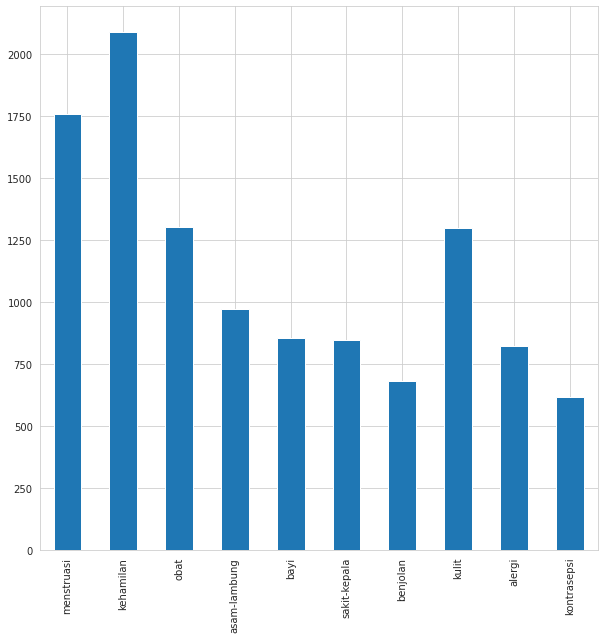

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size

vis.sum(axis=0).plot.bar()

In [ ]:
vis.sum(axis=0)

menstruasi      1757
kehamilan       2088
obat            1301
asam-lambung     974
bayi             854
sakit-kepala     847
benjolan         680
kulit           1300
alergi           824
kontrasepsi      619
dtype: int64

## Data Splitting

In [ ]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(formatted_data, test_size=0.1, random_state=42)
len(train_df), len(test_df)

(9000, 1000)

In [ ]:
train_df = pd.DataFrame(train_df)
train_df.columns = ["text", "labels"]

test_df = pd.DataFrame(test_df)
test_df.columns = ["text", "labels"]

# Modelling

## Simple Transformers

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from keras.initializers import Constant

In [ ]:
from simpletransformers.classification import (MultiLabelClassificationModel, MultiLabelClassificationArgs)
import logging

logging.basicConfig(level=logging.INFO)
transformers_logger = logging.getLogger("transformers")
transformers_logger.setLevel(logging.WARNING)

model_args = MultiLabelClassificationArgs(num_train_epochs=3)
model = MultiLabelClassificationModel(
    "bert",
    "cahya/bert-base-indonesian-522M",
    num_labels=total_labels,
    args=model_args,
)

Downloading:   0%|          | 0.00/468 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/424M [00:00<?, ?B/s]

Some weights of the model checkpoint at cahya/bert-base-indonesian-522M were not used when initializing BertForMultiLabelSequenceClassification: ['cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertForMultiLabelSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMultiLabelSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForMultiLabelSequenceClassification were not initialized fr

Downloading:   0%|          | 0.00/224k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/62.0 [00:00<?, ?B/s]

In [ ]:
!rm -rf outputs

In [ ]:
model.train_model(train_df)

INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


  0%|          | 0/10091 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_utils: Saving features into cached file cache_dir/cached_train_bert_128_0_2


Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 0 of 3:   0%|          | 0/1262 [00:00<?, ?it/s]

Running Epoch 1 of 3:   0%|          | 0/1262 [00:00<?, ?it/s]

Running Epoch 2 of 3:   0%|          | 0/1262 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_model: Training of bert model complete. Saved to outputs/.


(3786, 0.12779510964143076)

In [ ]:
result, model_outputs, wrong_predictions = model.eval_model(
    test_df
)

INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


  0%|          | 0/1122 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_utils: Saving features into cached file cache_dir/cached_dev_bert_128_0_2


Running Evaluation:   0%|          | 0/141 [00:00<?, ?it/s]

In [ ]:
predictions = (model_outputs > 0.5).astype(int)
pred_labels = []
for p in predictions:
    l = []
    for idx, label in enumerate(p):
        if label == 1:
            l.append(idx2label[idx])
    pred_labels.append(l)
    
actual_labels = []
raw_labels = []
for _, t in test_df.iterrows():
    l = []
    rl = []
    for idx, label in enumerate(t[1]):
        rl.append(label)
        if label == 1:
            l.append(idx2label[idx])
    actual_labels.append(l)
    raw_labels.append(rl)

In [ ]:
flattened_pred = [item for sublist in t for item in pred_labels]
flattened_actual = [item for sublist in t for item in actual_labels]

In [ ]:
print(classification_report(raw_labels, predictions, target_names=labels))

              precision    recall  f1-score   support

  menstruasi       0.94      0.94      0.94       521
   kehamilan       0.90      0.90      0.90       392
        obat       0.88      0.84      0.86       294
asam-lambung       0.93      0.92      0.92       100
        bayi       0.83      0.90      0.86        58
sakit-kepala       0.94      0.91      0.92        85
    benjolan       0.85      0.84      0.85        62
       kulit       0.87      0.92      0.89       216
      alergi       0.93      0.87      0.90       235
 kontrasepsi       0.92      0.90      0.91       281

   micro avg       0.91      0.90      0.90      2244
   macro avg       0.90      0.89      0.90      2244
weighted avg       0.91      0.90      0.90      2244
 samples avg       0.91      0.90      0.90      2244



In [ ]:
print(accuracy_score(raw_labels, predictions))

0.7834224598930482


In [ ]:
metricsReport("Bert",raw_labels,predictions)

------Bert Model Metrics-----
Accuracy: 0.7834
Hamming Loss: 0.0380
Precision:
  - Macro: 0.8994
  - Micro: 0.9091
Recall:
  - Macro: 0.8933
  - Micro: 0.9002
F1-measure:
  - Macro: 0.8959
  - Micro: 0.9046


In [ ]:
from sklearn.metrics import label_ranking_average_precision_score
label_ranking_average_precision_score(raw_labels,predictions)

0.8764705882352967

In [ ]:
test_df['predictions'] = predictions.tolist()
test_df

,text,labels,predictions
0,"Halo, Keterlambatan haid memang sering dihub...","[1, 1, 0, 0, 0, 0, 0, 0, 0, 0]","[1, 1, 0, 0, 0, 0, 0, 0, 0, 0]"
1,"Hai Ike,Timbulnya ruam kemerahan dan gatal di...","[0, 0, 0, 0, 0, 0, 0, 1, 1, 0]","[0, 0, 0, 0, 0, 0, 0, 1, 1, 0]"
2,"Hai, Perdarahan yang muncul di luar siklus hai...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 1]","[1, 0, 0, 0, 0, 0, 0, 0, 0, 1]"
3,"Siti Lautia, sejumlah perubahan terjadi pada k...","[0, 1, 0, 0, 0, 1, 0, 0, 0, 0]","[0, 1, 0, 0, 0, 1, 0, 0, 0, 0]"
4,"Halo Nheea Chayoo, terimakasih atas pertanyaan...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 1]","[0, 1, 0, 0, 0, 0, 0, 0, 0, 1]"
...,...,...,...
1117,"Halo Lutfia, terima kasih telah bertanya di Al...","[0, 0, 1, 0, 0, 0, 0, 1, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 1, 1, 0]"
1118,"Alo Yeti, Terimakasih atas pertanyaannya. Sikl...","[1, 0, 1, 0, 0, 0, 0, 0, 0, 0]","[1, 0, 0, 0, 0, 0, 0, 0, 0, 1]"
1119,"Salam, Dari info yang Anda sampaikan, adanya p...","[0, 0, 1, 0, 0, 0, 0, 0, 1, 0]","[0, 0, 1, 0, 0, 0, 0, 0, 1, 0]"
1120,"Hai,Adanya alergi terhadap cuaca dingin, atau ...","[0, 0, 0, 0, 0, 1, 0, 0, 1, 0]","[0, 0, 0, 0, 0, 1, 0, 0, 1, 0]"


In [ ]:
# test_df.to_csv('/content/drive/MyDrive/STKI/Hasil/bert.csv', index=False)

## LSTM

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing import text, sequence
from keras import initializers, regularizers, constraints, optimizers, layers
from keras.models import Model, Input, Sequential
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, SpatialDropout1D, Activation
from keras.layers import Conv1D, Bidirectional, GlobalMaxPool1D, MaxPooling1D, BatchNormalization
from tensorflow.keras.optimizers import Adam
from keras.utils.vis_utils import plot_model
import keras.backend as K
from keras.utils.vis_utils import plot_model
from keras.callbacks import EarlyStopping 

In [ ]:
train_df

,text,labels
0,"Alo, terimakasih atas pertanyaannya. Hipertens...","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]"
1,"Halo Icha,Memang munculnya bintik, terutama ji...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]"
2,"Salam, Dari info yang Anda sampaikan,adanya ri...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 1]"
3,"Halo, Keluhan nyeri perut kiri bagian bawah da...","[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]"
4,"Alo Chintya, Terimakasih telah bertanya ke Alo...","[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]"
...,...,...
8995,"Selamat siang, terimakasih atas pertanyaannya ...","[0, 0, 0, 0, 0, 0, 0, 1, 1, 0]"
8996,"Halo, terimakasih atas pertanyaannya untuk Alo...","[0, 1, 1, 0, 0, 0, 0, 0, 0, 0]"
8997,Hai Anggi terimakasih sudah bertanya di alodok...,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0]"
8998,"Halo Lia,Baik sertraline maupun fluoxetine mer...","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]"


In [ ]:
X_train = train_df["text"].astype(str).values
X_test  = test_df["text"].astype(str).values

y_train = pd.DataFrame.from_records(train_df["labels"].values).values
y_test  = pd.DataFrame.from_records(test_df["labels"].values).values

In [ ]:
num_words = 20000
max_features = 200000 
max_len = 200 
embedding_dims = 300 
num_epochs = 10 
val_split = 0.1
batch_size2 = 256

# comments Tokenization
tokenizer = tokenizer = Tokenizer()
tokenizer.fit_on_texts(list(X_train))

#Convert tokenized to sequnces
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)
 
# padding the sequences
X_train = sequence.pad_sequences(X_train, max_len)
X_test  = sequence.pad_sequences(X_test,  max_len)

print('X_train shape:', X_train.shape)
print('X_test shape: ', X_test.shape)

X_train shape: (9000, 200)
X_test shape:  (1000, 200)


In [ ]:
LSTM_model = Sequential([
    Embedding(input_dim=max_features, input_length=max_len, output_dim=embedding_dims),
    LSTM(units=300, return_sequences=True),
    Dropout(0.2),
    GlobalMaxPool1D(),
    Dense(10, activation = 'sigmoid')
])

def mean_pred(y_true, y_pred):
    return K.mean(y_pred)
    
LSTM_model.compile(loss='binary_crossentropy', optimizer=Adam(0.01), metrics=['accuracy', mean_pred])
LSTM_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 200, 300)          60000000  
                                                                 
 lstm_7 (LSTM)               (None, 200, 300)          721200    
                                                                 
 dropout_7 (Dropout)         (None, 200, 300)          0         
                                                                 
 global_max_pooling1d_7 (Glo  (None, 300)              0         
 balMaxPooling1D)                                                
                                                                 
 dense_9 (Dense)             (None, 10)                3010      
                                                                 
Total params: 60,724,210
Trainable params: 60,724,210
Non-trainable params: 0
__________________________________________

In [ ]:
LSTM_model_fit = LSTM_model.fit(X_train, y_train, batch_size=batch_size2, epochs=num_epochs, validation_split=val_split)#, callbacks=[early]

Epoch 1/10
36/36 [==============================] - 5s 89ms/step - loss: 0.3553 - accuracy: 0.5042 - mean_pred: 0.2145 - val_loss: 0.2069 - val_accuracy: 0.5871 - val_mean_pred: 0.2245
Epoch 2/10
36/36 [==============================] - 3s 78ms/step - loss: 0.1512 - accuracy: 0.4919 - mean_pred: 0.2005 - val_loss: 0.1423 - val_accuracy: 0.5149 - val_mean_pred: 0.2126
Epoch 3/10
36/36 [==============================] - 3s 78ms/step - loss: 0.1099 - accuracy: 0.4812 - mean_pred: 0.2005 - val_loss: 0.1122 - val_accuracy: 0.4822 - val_mean_pred: 0.2036
Epoch 4/10
36/36 [==============================] - 3s 76ms/step - loss: 0.0768 - accuracy: 0.4688 - mean_pred: 0.2001 - val_loss: 0.1041 - val_accuracy: 0.4941 - val_mean_pred: 0.2010
Epoch 5/10
36/36 [==============================] - 3s 77ms/step - loss: 0.0512 - accuracy: 0.4854 - mean_pred: 0.2006 - val_loss: 0.0941 - val_accuracy: 0.4465 - val_mean_pred: 0.1973
Epoch 6/10
36/36 [==============================] - 3s 78ms/step - loss: 0.

In [ ]:
LSTM_train_score = LSTM_model.evaluate(X_train, y_train, batch_size=batch_size2, verbose=1)
print('Train Loss:', LSTM_train_score[0])
print('Train Accuracy:', LSTM_train_score[1])

LSTM_test_score = LSTM_model.evaluate(X_test, y_test, batch_size=batch_size2, verbose=1)
print('Test Loss:', LSTM_test_score[0])
print('Test Accuracy:', LSTM_test_score[1])

40/40 [==============================] - 1s 22ms/step - loss: 0.0130 - accuracy: 0.4549 - mean_pred: 0.2000
Train Loss: 0.01304091326892376
Train Accuracy: 0.45486077666282654
5/5 [==============================] - 0s 21ms/step - loss: 0.1076 - accuracy: 0.4296 - mean_pred: 0.1988
Test Loss: 0.10762331634759903
Test Accuracy: 0.42959001660346985


In [ ]:
y_pred = LSTM_model.predict(X_test,batch_size=batch_size2,verbose=1)
predictions = (y_pred > 0.5).astype(int)

pred_labels = []
for p in predictions:
    l = []
    for idx, label in enumerate(p):
        if label == 1:
            l.append(idx2label[idx])
    pred_labels.append(l)

actual_labels = []
raw_labels = []
for _, t in test_df.iterrows():
    l = []
    rl = []
    for idx, label in enumerate(t[1]):
        rl.append(label)
        if label == 1:
            l.append(idx2label[idx])
    actual_labels.append(l)
    raw_labels.append(rl)

print(classification_report(raw_labels, predictions, target_names=labels))
print(accuracy_score(raw_labels, predictions))

5/5 [==============================] - 0s 20ms/step
              precision    recall  f1-score   support

  menstruasi       0.95      0.96      0.95       521
   kehamilan       0.90      0.93      0.92       392
        obat       0.91      0.88      0.90       294
asam-lambung       0.90      0.94      0.92       100
        bayi       0.90      0.90      0.90        58
sakit-kepala       0.95      0.89      0.92        85
    benjolan       0.96      0.89      0.92        62
       kulit       0.91      0.87      0.89       216
      alergi       0.93      0.90      0.91       235
 kontrasepsi       0.95      0.90      0.92       281

   micro avg       0.93      0.91      0.92      2244
   macro avg       0.93      0.91      0.92      2244
weighted avg       0.93      0.91      0.92      2244
 samples avg       0.93      0.91      0.91      2244

0.7896613190730838


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
predictions

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

In [ ]:
flattened_pred = [item for sublist in t for item in pred_labels]
flattened_actual = [item for sublist in t for item in actual_labels]

In [ ]:
from sklearn.metrics import label_ranking_average_precision_score
print(label_ranking_average_precision_score(raw_labels,predictions))
print(hamming_loss(raw_labels, predictions))

0.8947341057635192
0.031818181818181815


In [ ]:
test_df['predictions'] = predictions.tolist()
# test_df.to_csv('/content/drive/MyDrive/STKI/Hasil/lstm.csv', index=False)

### Word2Vec 
Running after data preprocessing

In [ ]:
import swifter
selected_data.answer = selected_data.answer.swifter.apply(lambda x: x.lower())
selected_data.answer = selected_data.answer.swifter.apply(lambda x: re.sub(r'[^a-zA-Z]', ' ', x))
selected_data.answer = selected_data.answer.swifter.apply(lambda x: re.sub(' +', ' ', x))

documents = selected_data.answer.swifter.apply(lambda x: x.split(" "))
documents

Pandas Apply:   0%|          | 0/10000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/10000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/10000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/10000 [00:00<?, ?it/s]

0       [alo, terima, kasih, atas, pertanyaannya, di, ...
1       [halo, adinda, kondisi, ruam, merah, dan, gata...
2       [halo, mas, dhimas, sensitif, terhadap, bau, d...
3       [halo, terlambatnya, siklus, menstruasi, bisa,...
4       [dear, fuad, benjolan, di, sekitar, kemaluan, ...
                              ...                        
9995    [hai, fifi, menstruasi, merupakan, siklus, ala...
9996    [alo, desi, terimakasih, atas, pertanyaan, and...
9997    [halo, pak, apakah, sebelumnya, anda, sudah, m...
9998    [selamat, siang, terima, kasih, telah, bertany...
9999    [dear, dessy, benjolan, sekitar, ketiak, dapat...
Name: answer, Length: 10000, dtype: object

In [ ]:
max_length = max([len(s) for s in documents])
print(max_length)

890


In [ ]:
# train skip-gram dengan library gensim
from gensim.models import Word2Vec

d = 300
model_sg = Word2Vec(documents, min_count=1, size=d, window=5, workers=-1, sg=1)
w2v_weights = model_sg.wv.vectors
vocab_size, embedding_size = w2v_weights.shape
print("Vocabulary Size: {} - Embedding Dim: {}".format(vocab_size, embedding_size))

Vocabulary Size: 29667 - Embedding Dim: 300


In [ ]:
# comments Tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts(documents)
sequences = tokenizer.texts_to_sequences(documents)
 
word_index = tokenizer.word_index
print(len(word_index))
sentence_pad = sequence.pad_sequences(sequences, max_length)
print('shape of data:', sentence_pad.shape)

29667
shape of data: (10000, 1572)


In [ ]:
num_words = len(word_index) + 1
embedding_matrix = np.zeros((num_words, 300))

for word, i in word_index.items():
  if i > num_words:
    continue
  embedding_vector = model_sg.wv.get_vector(word)
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(sentence_pad, labely, test_size=0.1, random_state=42)

In [ ]:
LSTM_model = Sequential([
    Embedding(len(word_index), embedding_size, weights=[w2v_weights], mask_zero=True, input_length=max_length, trainable=False),
    LSTM(units=300, return_sequences=True), #
    Dropout(0.2),
    GlobalMaxPool1D(),
    Dense(10, activation = 'sigmoid')
])

def mean_pred(y_true, y_pred):
    return K.mean(y_pred)

LSTM_model.compile(loss='binary_crossentropy', optimizer=Adam(0.01), metrics=['accuracy'])
labely = pd.DataFrame.from_records(selected_data['labelmap'].values).values
LSTM_model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_15 (Embedding)    (None, 1572, 300)         8900100   
                                                                 
 lstm_15 (LSTM)              (None, 100)               160400    
                                                                 
 dense_15 (Dense)            (None, 10)                1010      
                                                                 
Total params: 9,061,510
Trainable params: 161,410
Non-trainable params: 8,900,100
_________________________________________________________________


In [ ]:
LSTM_model_fit = LSTM_model.fit(X_train, y_train, batch_size=batch_size2, epochs=num_epochs, validation_data=(X_test, y_test))#, callbacks=[early]

Epoch 1/10
36/36 [==============================] - 115s 3s/step - loss: 0.3706 - accuracy: 0.1738 - val_loss: 0.3491 - val_accuracy: 0.1840
Epoch 2/10
36/36 [==============================] - 106s 3s/step - loss: 0.3427 - accuracy: 0.1821 - val_loss: 0.3473 - val_accuracy: 0.1840
Epoch 3/10
36/36 [==============================] - 106s 3s/step - loss: 0.3426 - accuracy: 0.1800 - val_loss: 0.3473 - val_accuracy: 0.1840
Epoch 4/10
36/36 [==============================] - 107s 3s/step - loss: 0.3423 - accuracy: 0.1818 - val_loss: 0.3475 - val_accuracy: 0.1840
Epoch 5/10
36/36 [==============================] - 107s 3s/step - loss: 0.3412 - accuracy: 0.1839 - val_loss: 0.3447 - val_accuracy: 0.1840
Epoch 6/10
36/36 [==============================] - 107s 3s/step - loss: 0.3398 - accuracy: 0.1942 - val_loss: 0.3430 - val_accuracy: 0.1830
Epoch 7/10
36/36 [==============================] - 110s 3s/step - loss: 0.3369 - accuracy: 0.2071 - val_loss: 0.3412 - val_accuracy: 0.1830
Epoch 8/10
36

In [ ]:
LSTM_train_score = LSTM_model.evaluate(X_train, y_train, batch_size=batch_size2, verbose=1)
print('Train Loss:', LSTM_train_score[0])
print('Train Accuracy:', LSTM_train_score[1])

LSTM_test_score = LSTM_model.evaluate(X_test, y_test, batch_size=batch_size2, verbose=1)
print('Test Loss:', LSTM_test_score[0])
print('Test Accuracy:', LSTM_test_score[1])

36/36 [==============================] - 10s 282ms/step - loss: 0.3193 - accuracy: 0.3017
Train Loss: 0.3193129003047943
Train Accuracy: 0.3016666769981384
4/4 [==============================] - 1s 277ms/step - loss: 0.3199 - accuracy: 0.2990
Test Loss: 0.3199330270290375
Test Accuracy: 0.29899999499320984


In [ ]:
y_pred = LSTM_model.predict(X_test,batch_size=batch_size2,verbose=1)
predictions = (y_pred > 0.5).astype(int)

pred_labels = []
for p in predictions:
    l = []
    for idx, label in enumerate(p):
        if label == 1:
            l.append(idx2label[idx])
    pred_labels.append(l)

actual_labels = []
raw_labels = []
for _, t in test_df.iterrows():
    l = []
    rl = []
    for idx, label in enumerate(t[1]):
        rl.append(label)
        if label == 1:
            l.append(idx2label[idx])
    actual_labels.append(l)
    raw_labels.append(rl)
print(classification_report(raw_labels, predictions, target_names=labels))
print(accuracy_score(raw_labels, predictions))

4/4 [==============================] - 2s 271ms/step
              precision    recall  f1-score   support

  menstruasi       0.00      0.00      0.00       164
   kehamilan       0.00      0.00      0.00       208
        obat       0.00      0.00      0.00       120
asam-lambung       0.00      0.00      0.00        93
        bayi       0.00      0.00      0.00        97
sakit-kepala       0.00      0.00      0.00        85
    benjolan       0.00      0.00      0.00        60
       kulit       0.00      0.00      0.00       152
      alergi       0.00      0.00      0.00        84
 kontrasepsi       0.00      0.00      0.00        55

   micro avg       0.00      0.00      0.00      1118
   macro avg       0.00      0.00      0.00      1118
weighted avg       0.00      0.00      0.00      1118
 samples avg       0.00      0.00      0.00      1118

0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### FastText

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer()
tokenizer.fit_on_texts(selected_data.answer)
sequences = tokenizer.texts_to_sequences(selected_data.answer)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=max_length)

labels2 = pd.DataFrame.from_records(selected_data['labelmap'].values).values
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels2.shape)

Found 29666 unique tokens.
Shape of data tensor: (10000, 890)
Shape of label tensor: (10000, 10)


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(data, labels2, test_size=0.1, random_state=42)

In [ ]:
# train skip-gram dengan library gensim
from gensim.models import FastText

d = 300
model_ft = FastText(documents, min_count=1, size=d, window=5, workers=-1, sg=1)
print("DONE")

tcmalloc: large alloc 2400002048 bytes == 0x56055b398000 @  0x7f079c1591e7 0x7f079295046e 0x7f07929a0c7b 0x7f07929a135f 0x7f0792a43103 0x5601e4d48544 0x5601e4d48240 0x5601e4dbc627 0x5601e4db69ee 0x5601e4d49bda 0x5601e4db8737 0x5601e4db6ced 0x5601e4d49bda 0x5601e4db8737 0x5601e4db69ee 0x5601e4d4a48c 0x5601e4d4a698 0x5601e4db8fe4 0x5601e4db6ced 0x5601e4d49bda 0x5601e4db8737 0x5601e4db6ced 0x5601e4d49bda 0x5601e4db8737 0x5601e4db6ced 0x5601e4d4a48c 0x5601e4d8b159 0x5601e4d880a4 0x5601e4d48d49 0x5601e4dbc94f 0x5601e4db69ee
tcmalloc: large alloc 2400002048 bytes == 0x56061659a000 @  0x7f079c1591e7 0x7f079295046e 0x7f07929a0c7b 0x7f07929a135f 0x7f0792a43103 0x5601e4d484b0 0x5601e4d48240 0x5601e4dbb973 0x5601e4db69ee 0x5601e4d49bda 0x5601e4db8737 0x5601e4db69ee 0x5601e4d49bda 0x5601e4db8737 0x5601e4db6ced 0x5601e4d49bda 0x5601e4db8737 0x5601e4db69ee 0x5601e4d4a48c 0x5601e4d4a698 0x5601e4db8fe4 0x5601e4db6ced 0x5601e4d49bda 0x5601e4db8737 0x5601e4db6ced 0x5601e4d49bda 0x5601e4db8737 0x5601e4db

DONE


In [ ]:
model_ft.wv.save_word2vec_format('ft_stki.txt', binary=False)
# model_sg.wv.save_word2vec_format('wv_stki.txt', binary=False)

In [ ]:
x_tokenized = [[w for w in sentence.split(" ") if w != ""] for sentence in selected_data.answer_clean]
len(x_tokenized)

In [ ]:
import os
embeddings_index = {}
# f = open(os.path.join('', '/content/drive/MyDrive/PreTrained/cc.id.300.vec'))
f = open(os.path.join('', 'ft_stki.txt'))

for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 29668 word vectors.


In [ ]:
embedding_matrix = np.zeros((len(word_index) + 1, 300))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

In [ ]:
LSTM_model = Sequential([
    Embedding(len(word_index) + 1, 300, weights=[embedding_matrix], input_length=max_length, trainable=False),
    LSTM(units=500, return_sequences=True),
    Dropout(0.2),
    GlobalMaxPool1D(),
    Dense(10, activation = 'sigmoid')
])
def mean_pred(y_true, y_pred):
    return K.mean(y_pred)

LSTM_model.compile(loss='binary_crossentropy', optimizer=Adam(0.01), metrics=['accuracy', mean_pred])
LSTM_model.summary()

Model: "sequential_58"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_59 (Embedding)    (None, 890, 300)          8900100   
                                                                 
 lstm_33 (LSTM)              (None, 890, 500)          1602000   
                                                                 
 dropout_28 (Dropout)        (None, 890, 500)          0         
                                                                 
 global_max_pooling1d_41 (Gl  (None, 500)              0         
 obalMaxPooling1D)                                               
                                                                 
 dense_58 (Dense)            (None, 10)                5010      
                                                                 
Total params: 10,507,110
Trainable params: 1,607,010
Non-trainable params: 8,900,100
__________________________________

In [ ]:
LSTM_model_fit = LSTM_model.fit(x_train, y_train, batch_size=256, epochs=10, validation_split=val_split)

Epoch 1/10
32/32 [==============================] - 17s 467ms/step - loss: 0.3910 - accuracy: 0.1620 - mean_pred: 0.1411 - val_loss: 0.3484 - val_accuracy: 0.1756 - val_mean_pred: 0.1358
Epoch 2/10
32/32 [==============================] - 15s 455ms/step - loss: 0.3484 - accuracy: 0.1730 - mean_pred: 0.1118 - val_loss: 0.3544 - val_accuracy: 0.1756 - val_mean_pred: 0.1503
Epoch 3/10
32/32 [==============================] - 15s 455ms/step - loss: 0.3482 - accuracy: 0.1790 - mean_pred: 0.1122 - val_loss: 0.3596 - val_accuracy: 0.1756 - val_mean_pred: 0.1667
Epoch 4/10
32/32 [==============================] - 15s 455ms/step - loss: 0.3482 - accuracy: 0.1686 - mean_pred: 0.1127 - val_loss: 0.3537 - val_accuracy: 0.1856 - val_mean_pred: 0.1539
Epoch 5/10
32/32 [==============================] - 15s 456ms/step - loss: 0.3467 - accuracy: 0.1775 - mean_pred: 0.1131 - val_loss: 0.3591 - val_accuracy: 0.1756 - val_mean_pred: 0.1580
Epoch 6/10
32/32 [==============================] - 15s 457ms/ste

In [ ]:
LSTM_train_score = LSTM_model.evaluate(x_train, y_train, batch_size=256, verbose=1)
print('Train Loss:', LSTM_train_score[0])
print('Train Accuracy:', LSTM_train_score[1])

LSTM_test_score = LSTM_model.evaluate(x_val, y_val, batch_size=256, verbose=1)
print('Test Loss:', LSTM_test_score[0])
print('Test Accuracy:', LSTM_test_score[1])

36/36 [==============================] - 6s 167ms/step - loss: 0.3565 - accuracy: 0.1154 - mean_pred: 0.1573
Train Loss: 0.3564893901348114
Train Accuracy: 0.11544444411993027
4/4 [==============================] - 1s 169ms/step - loss: 0.3537 - accuracy: 0.1430 - mean_pred: 0.1573
Test Loss: 0.3536742627620697
Test Accuracy: 0.14300000667572021


In [ ]:
y_pred = LSTM_model.predict(x_val,batch_size=256,verbose=1)
predictions = (y_pred > 0.5).astype(int)

pred_labels = []
for p in predictions:
    l = []
    for idx, label in enumerate(p):
        if label == 1:
            l.append(idx2label[idx])
    pred_labels.append(l)

actual_labels = []
raw_labels = []
for _, t in test_df.iterrows():
    l = []
    rl = []
    for idx, label in enumerate(t[1]):
        rl.append(label)
        if label == 1:
            l.append(idx2label[idx])
    actual_labels.append(l)
    raw_labels.append(rl)

print(classification_report(test_df['labels'].tolist(), predictions, target_names=labels))
print(accuracy_score(test_df['labels'].tolist(), predictions))

4/4 [==============================] - 1s 164ms/step
              precision    recall  f1-score   support

  menstruasi       0.00      0.00      0.00       164
   kehamilan       0.00      0.00      0.00       208
        obat       0.00      0.00      0.00       120
asam-lambung       0.00      0.00      0.00        93
        bayi       0.00      0.00      0.00        97
sakit-kepala       0.00      0.00      0.00        85
    benjolan       0.00      0.00      0.00        60
       kulit       0.00      0.00      0.00       152
 kontrasepsi       0.00      0.00      0.00        84
      alergi       0.00      0.00      0.00        55

   micro avg       0.00      0.00      0.00      1118
   macro avg       0.00      0.00      0.00      1118
weighted avg       0.00      0.00      0.00      1118
 samples avg       0.00      0.00      0.00      1118

0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import label_ranking_average_precision_score
print(label_ranking_average_precision_score(test_df['labels'].tolist(),predictions))
print(hamming_loss(test_df['labels'].tolist(), predictions))

0.11179999999999865
0.1118


In [ ]:
metricsReport("LSTM-FastText",test_df['labels'].tolist(),predictions)

------LSTM-FastText Model Metrics-----
Accuracy: 0.0000
Hamming Loss: 0.1118
Precision:
  - Macro: 0.0000
  - Micro: 0.0000
Recall:
  - Macro: 0.0000
  - Micro: 0.0000
F1-measure:
  - Macro: 0.0000
  - Micro: 0.0000


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
test_df['predictions'] = predictions.tolist()
# test_df.to_csv('/content/drive/MyDrive/STKI/Hasil/lstm+fasttext(pretrained).csv', index=False)

## CNN

In [ ]:
from keras.layers import Dense, Activation, Embedding, Flatten, GlobalMaxPool1D, Dropout, Conv1D, MaxPooling1D

In [ ]:
CNN_model = Sequential([
    Embedding(len(word_index) + 1, 300, weights=[embedding_matrix], input_length=max_length, trainable=False), #ini untuk w2v dan ft
    Conv1D(300, 3,  padding='valid', activation='relu', strides=1),
    GlobalMaxPool1D(),
    Dense(10, activation = 'softmax')
])

def mean_pred(y_true, y_pred):
    return K.mean(y_pred)

CNN_model.compile(loss='binary_crossentropy', optimizer=Adam(0.01), metrics=['accuracy', mean_pred])
CNN_model.summary()

Model: "sequential_56"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_57 (Embedding)    (None, 890, 300)          8900100   
                                                                 
 conv1d_34 (Conv1D)          (None, 888, 300)          270300    
                                                                 
 global_max_pooling1d_40 (Gl  (None, 300)              0         
 obalMaxPooling1D)                                               
                                                                 
 dense_56 (Dense)            (None, 10)                3010      
                                                                 
Total params: 9,173,410
Trainable params: 273,310
Non-trainable params: 8,900,100
_________________________________________________________________


In [ ]:
CNN_model_fit = CNN_model.fit(x_train, y_train, batch_size=256, epochs=10, validation_split=val_split)#, callbacks=[early]

Epoch 1/10
32/32 [==============================] - 3s 76ms/step - loss: 0.4123 - accuracy: 0.1611 - mean_pred: 0.1000 - val_loss: 0.3479 - val_accuracy: 0.1856 - val_mean_pred: 0.1000
Epoch 2/10
32/32 [==============================] - 2s 71ms/step - loss: 0.3430 - accuracy: 0.1822 - mean_pred: 0.1000 - val_loss: 0.3417 - val_accuracy: 0.1856 - val_mean_pred: 0.1000
Epoch 3/10
32/32 [==============================] - 2s 71ms/step - loss: 0.3398 - accuracy: 0.1838 - mean_pred: 0.1000 - val_loss: 0.3388 - val_accuracy: 0.1856 - val_mean_pred: 0.1000
Epoch 4/10
32/32 [==============================] - 2s 71ms/step - loss: 0.3328 - accuracy: 0.2046 - mean_pred: 0.1000 - val_loss: 0.3265 - val_accuracy: 0.2522 - val_mean_pred: 0.1000
Epoch 5/10
32/32 [==============================] - 2s 72ms/step - loss: 0.3121 - accuracy: 0.3122 - mean_pred: 0.1000 - val_loss: 0.2968 - val_accuracy: 0.3800 - val_mean_pred: 0.1000
Epoch 6/10
32/32 [==============================] - 2s 71ms/step - loss: 0.

In [ ]:
CNN_train_score = CNN_model.evaluate(x_train, y_train, batch_size=256, verbose=1)
print('Train Loss:', CNN_train_score[0])
print('Train Accuracy:', CNN_train_score[1])

CNN_test_score = CNN_model.evaluate(x_val, y_val, batch_size=256, verbose=1)
print('Test Loss:', CNN_test_score[0])
print('Test Accuracy:', CNN_test_score[1])

36/36 [==============================] - 1s 23ms/step - loss: 0.1632 - accuracy: 0.7010 - mean_pred: 0.1000
Train Loss: 0.1631554365158081
Train Accuracy: 0.7009999752044678
4/4 [==============================] - 0s 24ms/step - loss: 0.1660 - accuracy: 0.7280 - mean_pred: 0.1000
Test Loss: 0.16597287356853485
Test Accuracy: 0.7279999852180481


In [ ]:
y_pred = CNN_model.predict(x_val,batch_size=128,verbose=1)
predictions = (y_pred > 0.5).astype(int)

pred_labels = []
for p in predictions:
    l = []
    for idx, label in enumerate(p):
        if label == 1:
            l.append(idx2label[idx])
    pred_labels.append(l)

actual_labels = []
raw_labels = []
for _, t in test_df.iterrows():
    l = []
    rl = []
    for idx, label in enumerate(t[1]):
        rl.append(label)
        if label == 1:
            l.append(idx2label[idx])
    actual_labels.append(l)
    raw_labels.append(rl)

print(classification_report(y_val, predictions, target_names=labels))
print(accuracy_score(y_val, predictions))

8/8 [==============================] - 0s 12ms/step
              precision    recall  f1-score   support

  menstruasi       0.82      0.65      0.72       164
   kehamilan       0.89      0.76      0.82       208
        obat       0.77      0.47      0.59       120
asam-lambung       0.86      0.83      0.84        93
        bayi       0.90      0.86      0.88        97
sakit-kepala       0.91      0.58      0.71        85
    benjolan       1.00      0.07      0.12        60
       kulit       0.75      0.81      0.78       152
 kontrasepsi       0.00      0.00      0.00        84
      alergi       0.78      0.38      0.51        55

   micro avg       0.84      0.61      0.70      1118
   macro avg       0.77      0.54      0.60      1118
weighted avg       0.78      0.61      0.66      1118
 samples avg       0.68      0.63      0.65      1118

0.582


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
metricsReport("CNN+FT",test_df['labels'].tolist(),predictions)

------CNN+FT Model Metrics-----
Accuracy: 0.5820
Hamming Loss: 0.0572
Precision:
  - Macro: 0.7682
  - Micro: 0.8370
Recall:
  - Macro: 0.5399
  - Micro: 0.6064
F1-measure:
  - Macro: 0.5975
  - Micro: 0.7033


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import label_ranking_average_precision_score
print(label_ranking_average_precision_score(test_df['labels'].tolist(),predictions))
print(hamming_loss(test_df['labels'].tolist(), predictions))

0.6735000000000052
0.0572


In [ ]:
test_df['predictions'] = predictions.tolist()
# test_df.to_csv('/content/drive/MyDrive/STKI/Hasil/cnn+fasttext.csv', index=False)

In [ ]:
test_df

,text,labels,predictions
0,Hai Ummah. Jerawat merupakan salah satu kondis...,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]"
1,"Halo, Munculnya bintik merah pada kulit dapa...","[0, 0, 0, 0, 0, 0, 0, 0, 1, 0]","[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]"
2,Halo Fera Terima kasih telah bertanya pada Alo...,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]"
3,Dear Rani.....Terimakasih atas pertanyaan Anda...,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]"
4,"Hai Ade Zakiah, terimakasih telah bertanya ke ...","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]","[1, 0, 1, 0, 0, 0, 0, 0, 0, 0]"
...,...,...,...
995,"Halo, terima kasih sudah bertanya di alodokter...","[0, 0, 0, 0, 0, 0, 1, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 1, 0, 0, 0]"
996,HaiGatal pada jari disertai melenting air dapa...,"[0, 0, 0, 0, 0, 0, 0, 1, 1, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 1, 0]"
997,"Hai,Kehamilan terjadi saat sel telur dibuahi o...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]"
998,"Halo, terimakasih sudah bertanya ke Alodokter....","[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]"


## Machine Learning

In [ ]:
!pip install Sastrawi

# Import Stopword from Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Removal Indonesian Stopword using Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
stop_factory = StopWordRemoverFactory()
more_stopword = ['dengan', 'ia', 'bahwa', 'oleh', 'nya', 'jadi', 'untuk']
data_stopword = stop_factory.get_stop_words() + more_stopword

     |████████████████████████████████| 209 kB 8.2 MB/s 


In [ ]:
from spacy.lang.id import Indonesian
import spacy
spacy.require_gpu()
nlp = Indonesian()  # use directly
nlp = spacy.blank('id')  # blank instance'
nlp.add_pipe(nlp.create_pipe('sentencizer'))

In [ ]:
from nlp_id.lemmatizer import Lemmatizer 
lemmatizer = Lemmatizer() 

def preprocess(s):
    s = s.strip().lower()   #case folding dan menghilangkan new line
    s = re.sub(r'(\W)(?=\1)', '', s) #hapus duplikat tanda baca
    s = s.replace("\n", " ") #hapus line break
    sentence = re.sub(r'[^a-zA-Z]', ' ', s) #hapus simbol dan angka
    sentence = re.sub(r"\b[a-zA-Z]\b", " ", sentence) #remove 1 alphabet
    sentence = lemmatizer.lemmatize(sentence) # lemmatisasi
    sentence = re.sub(' +', ' ', sentence) # remove double space
    sentence = sentence.split(" ")
    sentence = [word for word in sentence if len(word)>3] # hapus kata yang <= 3 huruf
    sentence = [word for word in sentence if word not in data_stopword] # hapus stopword
    result_sentence = " ".join(sentence).strip()
    return result_sentence

In [ ]:
import swifter
selected_data['answer_clean'] = selected_data.answer.swifter.apply(lambda x: preprocess(x))

Pandas Apply:   0%|          | 0/10000 [00:00<?, ?it/s]

#### TF-IDF x ML

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics

vectorizer = TfidfVectorizer().fit(train_df["text"])
vectorised_train_documents = vectorizer.fit_transform(train_df["text"])
vectorised_test_documents = vectorizer.transform(test_df["text"])

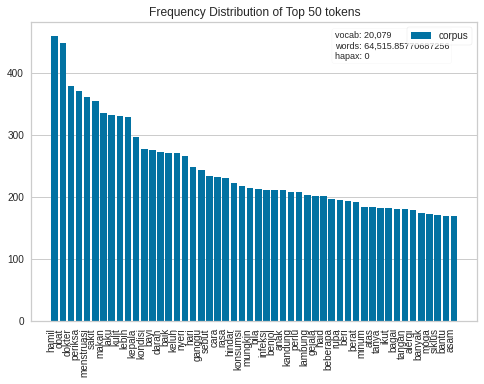

In [ ]:
from yellowbrick.text import FreqDistVisualizer
features = vectorizer.get_feature_names()
visualizer = FreqDistVisualizer(features=features, orient='v')
visualizer.fit(vectorised_train_documents)
visualizer.show()

In [ ]:
def mappingLabel(x):
    hashtable = []
    for i in label2idx:
        if i in x:
            hashtable.append(i)
        else:
            continue
    return hashtable

In [ ]:
formatted_data = []

for _, data in selected_data.iterrows():
    formatted_data.append([data.answer_clean, data.labelmap]) #labelmap_new

In [ ]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(formatted_data, test_size=0.1, random_state=42)
train_df = pd.DataFrame(train_df)
train_df.columns = ["text", "labels"]

test_df = pd.DataFrame(test_df)
test_df.columns = ["text", "labels"]
test_df

,text,labels
0,ummah jerawat rupa salah satu kondisi radang k...,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]"
1,halo muncul bintik merah kulit beberapa faktor...,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0]"
2,halo fera terima kasih tanya alodokter berdasa...,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]"
3,dear rani terimakasih atas tanya perlu tahu pe...,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]"
4,zakiah terimakasih tanya aldokter clomiphene c...,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]"
...,...,...
995,halo terima kasih tanya alodokter beberapa ben...,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0]"
996,haigatal jari lenting beberapa mungkin skabies...,"[0, 0, 0, 0, 0, 0, 0, 1, 1, 0]"
997,hamil telur buah sperma hubung seksual status ...,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]"
998,halo terimakasih tanya alodokter sakit nyeri k...,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]"


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, hamming_loss

ModelsPerformance = {}

def metricsReport(modelName, test_labels, predictions):
    accuracy = accuracy_score(test_labels, predictions)

    macro_precision = precision_score(test_labels, predictions, average='macro')
    macro_recall = recall_score(test_labels, predictions, average='macro')
    macro_f1 = f1_score(test_labels, predictions, average='macro')

    micro_precision = precision_score(test_labels, predictions, average='micro')
    micro_recall = recall_score(test_labels, predictions, average='micro')
    micro_f1 = f1_score(test_labels, predictions, average='micro')
    hamLoss = hamming_loss(test_labels, predictions)
    print("------" + modelName + " Model Metrics-----")
    print("Accuracy: {:.4f}\nHamming Loss: {:.4f}\nPrecision:\n  - Macro: {:.4f}\n  - Micro: {:.4f}\nRecall:\n  - Macro: {:.4f}\n  - Micro: {:.4f}\nF1-measure:\n  - Macro: {:.4f}\n  - Micro: {:.4f}"\
          .format(accuracy, hamLoss, macro_precision, micro_precision, macro_recall, micro_recall, macro_f1, micro_f1))
    ModelsPerformance[modelName] = micro_f1

##### NB

In [ ]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.multiclass import OneVsRestClassifier

naive = OneVsRestClassifier(BernoulliNB(), n_jobs=-1)
naive.fit(vectorised_train_documents, train_df['labels'].tolist())
naivePredictions = naive.predict(vectorised_test_documents)
metricsReport("naive",test_df['labels'].tolist(),naivePredictions)

------naive Model Metrics-----
Accuracy: 0.3734
Hamming Loss: 0.0873
Precision:
  - Macro: 0.7106
  - Micro: 0.7349
Recall:
  - Macro: 0.8350
  - Micro: 0.8819
F1-measure:
  - Macro: 0.7646
  - Micro: 0.8017


In [ ]:
from sklearn.metrics import label_ranking_average_precision_score
label_ranking_average_precision_score(test_df['labels'].tolist(),naivePredictions)

0.7270202020202005

In [ ]:
test_df['predictions'] = naivePredictions.tolist()
# test_df.to_csv('/content/drive/MyDrive/STKI/Hasil/nb-tfidf.csv', index=False)

##### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knnClf = KNeighborsClassifier()
knnClf.fit(vectorised_train_documents, train_df['labels'].tolist())
knnPredictions = knnClf.predict(vectorised_test_documents)
metricsReport("knn",test_df['labels'].tolist(),knnPredictions)

------knn Model Metrics-----
Accuracy: 0.6578
Hamming Loss: 0.0612
Precision:
  - Macro: 0.8698
  - Micro: 0.8643
Recall:
  - Macro: 0.7928
  - Micro: 0.8231
F1-measure:
  - Macro: 0.8274
  - Micro: 0.8432


In [ ]:
from sklearn.metrics import label_ranking_average_precision_score
label_ranking_average_precision_score(test_df['labels'].tolist(),knnPredictions)

0.8005347593582933

In [ ]:
test_df['predictions'] = knnPredictions.tolist()
# test_df.to_csv('/content/drive/MyDrive/STKI/Hasil/knn-tfidf.csv', index=False)

##### SVM

In [ ]:
from sklearn.svm import LinearSVC

svmClassifier = OneVsRestClassifier(LinearSVC(), n_jobs=-1)
svmClassifier.fit(vectorised_train_documents, train_df['labels'].tolist())
svmPreds = svmClassifier.predict(vectorised_test_documents)
metricsReport("svm",test_df['labels'].tolist(),svmPreds)

------svm Model Metrics-----
Accuracy: 0.7736
Hamming Loss: 0.0314
Precision:
  - Macro: 0.9313
  - Micro: 0.9347
Recall:
  - Macro: 0.9022
  - Micro: 0.9064
F1-measure:
  - Macro: 0.9161
  - Micro: 0.9204


In [ ]:
from sklearn.metrics import label_ranking_average_precision_score
label_ranking_average_precision_score(test_df['labels'].tolist(),svmPreds)

0.8911913250148569

In [ ]:
test_df['predictions'] = svmPreds.tolist()
test_df.to_csv('/content/drive/MyDrive/STKI/Hasil/svm-tfidf.csv', index=False)

##### DT

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtClassifier = DecisionTreeClassifier()
dtClassifier.fit(vectorised_train_documents, train_df['labels'].tolist())
dtPreds = dtClassifier.predict(vectorised_test_documents)
metricsReport("Decision Tree", test_df['labels'].tolist(), dtPreds)

------Decision Tree Model Metrics-----
Accuracy: 0.8048
Hamming Loss: 0.0415
Precision:
  - Macro: 0.8833
  - Micro: 0.8962
Recall:
  - Macro: 0.8851
  - Micro: 0.8962
F1-measure:
  - Macro: 0.8840
  - Micro: 0.8962


In [ ]:
from sklearn.metrics import label_ranking_average_precision_score
label_ranking_average_precision_score(test_df['labels'].tolist(),dtPreds)

0.8712566844919818

In [ ]:
test_df['predictions'] = dtPreds.tolist()
test_df.to_csv('/content/drive/MyDrive/STKI/Hasil/dt-tfidf.csv', index=False)

##### CNN

In [ ]:
tfidf_vector_X = vectorizer.transform(train_df["text"]).toarray()  #//shape - (3,6)
tfidf_vector_Y = vectorizer.transform(test_df["text"]).toarray() #//shape - (3,6)

tfidf_vector_X = tfidf_vector_X.T
tfidf_vector_Y = tfidf_vector_Y.T

tfidf_vector_X = tfidf_vector_X[:, :, None] #//shape - (3,6,1) 
tfidf_vector_Y = tfidf_vector_Y[:, :, None] #//shape - (3,6,1)

tcmalloc: large alloc 1890574336 bytes == 0x55a7b8820000 @  0x7f6dbd11d001 0x7f6db391254f 0x7f6db3962b58 0x7f6db3966b17 0x7f6db3a05203 0x55a7651aa544 0x55a7651aa240 0x55a76521e627 0x55a7651abafa 0x55a76521dd00 0x55a7652189ee 0x55a7651abbda 0x55a76521dd00 0x55a7652189ee 0x55a7652186f3 0x55a765216b60 0x55a7651aa349 0x55a7651aa240 0x55a76521d973 0x55a76529ddd5 0x55a76521ac6f 0x55a76529ddd5 0x55a76521ac6f 0x55a76529ddd5 0x55a7651aa2ed 0x55a76529be1d 0x55a76521de99 0x55a7651abafa 0x55a765219915 0x55a7651abafa 0x55a765219c0d


In [ ]:
model=Sequential()
model.add(LSTM(100, return_sequences=False, input_shape=(1, 10091)))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=Adam(0.01), metrics = ['accuracy'])

print(model.summary())

# model.fit(X_train, y_train, epochs=1, verbose=1)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 100)               4076800   
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_4 (Dense)             (None, 1)                 101       
                                                                 
Total params: 4,076,901
Trainable params: 4,076,901
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
model.fit(X_train, y_train, epochs=1, verbose=1)

2021-12-07 10:19:28.206612: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 850752028 exceeds 10% of free system memory.


In [ ]:
CNN_model = Sequential([
    Conv1D(input_shape = X_train.shape[1:], 3,  padding='valid', activation='relu', strides=1),
    GlobalMaxPool1D(),
    Dense(10, activation = 'sigmoid')
])

def mean_pred(y_true, y_pred):
    return K.mean(y_pred)

CNN_model.compile(loss='binary_crossentropy', optimizer=Adam(0.01), metrics=['accuracy', mean_pred])
CNN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 300)          60000000  
                                                                 
 conv1d (Conv1D)             (None, 198, 300)          270300    
                                                                 
 global_max_pooling1d (Globa  (None, 300)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 10)                3010      
                                                                 
Total params: 60,273,310
Trainable params: 60,273,310
Non-trainable params: 0
_________________________________________________________________


In [ ]:
CNN_model_fit = CNN_model.fit(X_train, y_train, batch_size=batch_size2, epochs=num_epochs, validation_split=val_split)#, callbacks=[early]

In [ ]:
CNN_train_score = CNN_model.evaluate(X_train, y_train, batch_size=batch_size2, verbose=1)
print('Train Loss:', CNN_train_score[0])
print('Train Accuracy:', CNN_train_score[1])

CNN_test_score = CNN_model.evaluate(X_test, y_test, batch_size=batch_size2, verbose=1)
print('Test Loss:', CNN_test_score[0])
print('Test Accuracy:', CNN_test_score[1])

40/40 [==============================] - 0s 9ms/step - loss: 0.0133 - accuracy: 0.4915 - mean_pred: 0.1996
Train Loss: 0.013304909691214561
Train Accuracy: 0.49152711033821106
5/5 [==============================] - 0s 10ms/step - loss: 0.1381 - accuracy: 0.4982 - mean_pred: 0.1987
Test Loss: 0.13805781304836273
Test Accuracy: 0.49821746349334717


### Word2Vec x ML

In [ ]:
documents = selected_data.answer_clean.swifter.apply(lambda x: x.split(" "))
documents

Pandas Apply:   0%|          | 0/10000 [00:00<?, ?it/s]

0       [terima, kasih, atas, tanya, alodokter, hilang...
1       [halo, adinda, kondisi, ruam, merah, gatal, wa...
2       [halo, dhimas, sensitif, hadap, sebut, hyperos...
3       [halo, lambat, siklus, menstruasi, banyak, fak...
4       [dear, fuad, benjol, malu, hernia, ingunalis, ...
                              ...                        
9995    [fifi, menstruasi, rupa, siklus, alamiah, wani...
9996    [desi, terimakasih, atas, tanya, dasar, usia, ...
9997    [halo, periksa, anak, dokter, kelopak, mata, a...
9998    [selamat, siang, terima, kasih, tanya, alodokt...
9999    [dear, dessy, benjol, ketiak, bengkak, kelenja...
Name: answer_clean, Length: 10000, dtype: object

In [ ]:
# train skip-gram dengan library gensim
from gensim.models import Word2Vec

d = 300
model_sg = Word2Vec(documents, min_count=1, size=d, window=5, workers=-1, sg=1)
print("DONE")

In [ ]:
x_tokenized = [[w for w in sentence.split(" ") if w != ""] for sentence in selected_data.answer_clean]
len(x_tokenized)

11213

In [ ]:
# NOTE: 
# tidak dapat langsung menggunakan hasil dari word embedding
# representasi vektor embedding adalah representasi per kata
# harus mengkonversikan dari word embedding ke dalam vektor space
# dokumen x words
def sent_vectorizer(sent, model):
  sent_vec =[]
  numw = 0
  for w in sent:
    try:
      if numw == 0:
        sent_vec = model[w]
      else:
        sent_vec = np.add(sent_vec, model[w])
      numw += 1
    except:
        pass
  return np.asarray(sent_vec) / numw
 
X_new=[]
for sentence in x_tokenized:
    X_new.append(sent_vectorizer(sentence, model_sg)) 
X_new = np.array(X_new)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_new, selected_data['labelmap'], test_size=.1, random_state=42)
print(X_train.shape, X_test.shape)

(10091, 300) (1122, 300)


##### NB

In [ ]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.multiclass import OneVsRestClassifier

naive = OneVsRestClassifier(BernoulliNB(), n_jobs=-1)
naive.fit(X_train, Y_train.tolist())
naivePredictions = naive.predict(X_test)
metricsReport("naive",Y_test.tolist(),naivePredictions)

------naive Model Metrics-----
Accuracy: 0.2692
Hamming Loss: 0.1140
Precision:
  - Macro: 0.6093
  - Micro: 0.6719
Recall:
  - Macro: 0.8328
  - Micro: 0.8405
F1-measure:
  - Macro: 0.6942
  - Micro: 0.7468


In [ ]:
from sklearn.metrics import label_ranking_average_precision_score
label_ranking_average_precision_score(Y_test.tolist(),naivePredictions)

0.6619132501485452

In [ ]:
test_df['predictions'] = naivePredictions.tolist()
test_df.to_csv('/content/drive/MyDrive/STKI/Hasil/nb-word2vec.csv', index=False)

##### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier

knnClf = KNeighborsClassifier()

knnClf.fit(X_train, Y_train.tolist())
knnPredictionsW2V = knnClf.predict(X_test)
metricsReport("knn", Y_test.tolist(), knnPredictionsW2V)

------knn Model Metrics-----
Accuracy: 0.6373
Hamming Loss: 0.0681
Precision:
  - Macro: 0.8564
  - Micro: 0.8439
Recall:
  - Macro: 0.7557
  - Micro: 0.8093
F1-measure:
  - Macro: 0.7967
  - Micro: 0.8262


In [ ]:
from sklearn.metrics import label_ranking_average_precision_score
label_ranking_average_precision_score(Y_test.tolist(),knnPredictionsW2V)

0.7819073083779015

In [ ]:
test_df['predictions'] = knnPredictionsW2V.tolist()
test_df.to_csv('/content/drive/MyDrive/STKI/Hasil/knn-word2vec.csv', index=False)

##### SVM

In [ ]:
from sklearn.svm import SVC

svmClassifier = OneVsRestClassifier(SVC(), n_jobs=-1)
svmClassifier.fit(X_train, Y_train.tolist())

svmPredsW2V = svmClassifier.predict(X_test)
metricsReport("svm",Y_test.tolist(), svmPredsW2V)

------svm Model Metrics-----
Accuracy: 0.7059
Hamming Loss: 0.0412
Precision:
  - Macro: 0.9168
  - Micro: 0.9195
Recall:
  - Macro: 0.8451
  - Micro: 0.8703
F1-measure:
  - Macro: 0.8779
  - Micro: 0.8942


In [ ]:
from sklearn.metrics import label_ranking_average_precision_score
label_ranking_average_precision_score(Y_test.tolist(),svmPredsW2V)

0.8558526440879413

In [ ]:
test_df['predictions'] = svmPredsW2V.tolist()
test_df.to_csv('/content/drive/MyDrive/STKI/Hasil/svm-word2vec.csv', index=False)

##### DT

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtClassifier = DecisionTreeClassifier()
dtClassifier.fit(X_train, Y_train.tolist())
dtPredsW2V = dtClassifier.predict(X_test)
metricsReport("Decision Tree", Y_test.tolist(), dtPredsW2V)

------Decision Tree Model Metrics-----
Accuracy: 0.6934
Hamming Loss: 0.0818
Precision:
  - Macro: 0.7367
  - Micro: 0.7955
Recall:
  - Macro: 0.7450
  - Micro: 0.7955
F1-measure:
  - Macro: 0.7401
  - Micro: 0.7955


In [ ]:
from sklearn.metrics import label_ranking_average_precision_score
label_ranking_average_precision_score(Y_test.tolist(),dtPredsW2V)

0.7853386809269203

In [ ]:
test_df['predictions'] = dtPredsW2V.tolist()
test_df.to_csv('/content/drive/MyDrive/STKI/Hasil/dt-word2vec.csv', index=False)
test_df

,text,labels,predictions
0,halo lambat haid memang sering hubung hamil ha...,"[1, 1, 0, 0, 0, 0, 0, 0, 0, 0]","[1, 1, 0, 0, 0, 0, 0, 0, 0, 0]"
1,timbul ruam merah gatal ketiak alami iritasi r...,"[0, 0, 0, 0, 0, 0, 0, 1, 1, 0]","[0, 0, 0, 0, 0, 0, 0, 1, 1, 0]"
2,darah muncul luar siklus haid bagai efek sampi...,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 1]","[1, 0, 0, 0, 0, 0, 0, 0, 0, 1]"
3,siti lautia jumlah ubah hamil instabilitas hor...,"[0, 1, 0, 0, 0, 1, 0, 0, 0, 0]","[0, 1, 0, 0, 0, 1, 0, 0, 0, 0]"
4,halo nheea chayoo terimakasih atas tanya alodo...,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 1]","[1, 0, 0, 0, 0, 0, 0, 0, 0, 1]"
...,...,...,...
1117,halo lutfia terima kasih tanya alodokter eksim...,"[0, 0, 1, 0, 0, 0, 0, 1, 0, 0]","[0, 0, 1, 0, 0, 0, 0, 0, 1, 0]"
1118,yeti terimakasih atas tanya siklus menstruasi ...,"[1, 0, 1, 0, 0, 0, 0, 0, 0, 0]","[1, 0, 1, 0, 0, 0, 0, 0, 0, 0]"
1119,salam info pakai obat anti alergi bentuk sempr...,"[0, 0, 1, 0, 0, 0, 0, 0, 1, 0]","[0, 0, 0, 0, 1, 0, 1, 0, 0, 0]"
1120,alergi hadap cuaca dingin aroma timbul gejala ...,"[0, 0, 0, 0, 0, 1, 0, 0, 1, 0]","[0, 0, 0, 0, 0, 1, 0, 0, 1, 0]"


### FastText x ML

In [ ]:
documents = selected_data.answer_clean.swifter.apply(lambda x: x.split(" "))
documents

Pandas Apply:   0%|          | 0/10000 [00:00<?, ?it/s]

0       [terima, kasih, atas, tanya, alodokter, hilang...
1       [halo, adinda, kondisi, ruam, merah, gatal, wa...
2       [halo, dhimas, sensitif, hadap, sebut, hyperos...
3       [halo, lambat, siklus, menstruasi, banyak, fak...
4       [dear, fuad, benjol, malu, hernia, ingunalis, ...
                              ...                        
9995    [fifi, menstruasi, rupa, siklus, alamiah, wani...
9996    [desi, terimakasih, atas, tanya, dasar, usia, ...
9997    [halo, periksa, anak, dokter, kelopak, mata, a...
9998    [selamat, siang, terima, kasih, tanya, alodokt...
9999    [dear, dessy, benjol, ketiak, bengkak, kelenja...
Name: answer_clean, Length: 10000, dtype: object

In [ ]:
# train skip-gram dengan library gensim
from gensim.models import FastText

d = 300
model_ft = FastText(documents, min_count=1, size=d, window=5, workers=-1, sg=1)
print("DONE")

tcmalloc: large alloc 2400002048 bytes == 0x56053f57c000 @  0x7f079c1591e7 0x7f079295046e 0x7f07929a0c7b 0x7f07929a135f 0x7f0792a43103 0x5601e4d48544 0x5601e4d48240 0x5601e4dbc627 0x5601e4db69ee 0x5601e4d49bda 0x5601e4db8737 0x5601e4db6ced 0x5601e4d49bda 0x5601e4db8737 0x5601e4db69ee 0x5601e4d4a48c 0x5601e4d4a698 0x5601e4db8fe4 0x5601e4db6ced 0x5601e4d49bda 0x5601e4db8737 0x5601e4db6ced 0x5601e4d49bda 0x5601e4db8737 0x5601e4db6ced 0x5601e4d4a48c 0x5601e4d8b159 0x5601e4d880a4 0x5601e4d48d49 0x5601e4dbc94f 0x5601e4db69ee


DONE


In [ ]:
x_tokenized = [[w for w in sentence.split(" ") if w != ""] for sentence in selected_data.answer_clean]
len(x_tokenized)

10000

In [ ]:
# NOTE: 
# tidak dapat langsung menggunakan hasil dari word embedding
# representasi vektor embedding adalah representasi per kata
# harus mengkonversikan dari word embedding ke dalam vektor space
# dokumen x words
def sent_vectorizer(sent, model):
  sent_vec =[]
  numw = 0
  for w in sent:
    try:
      if numw == 0:
        sent_vec = model[w]
      else:
        sent_vec = np.add(sent_vec, model[w])
      numw += 1
    except:
        pass
  return np.asarray(sent_vec) / numw
 
X_new=[]
for sentence in x_tokenized:
    X_new.append(sent_vectorizer(sentence, model_ft)) 
X_new = np.array(X_new)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [ ]:
len(X_new)

10000

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_new, selected_data['labelmap'], test_size=.1, random_state=42)
print(X_train.shape, X_test.shape)

(9000, 300) (1000, 300)


In [ ]:
# from sklearn.preprocessing import MultiLabelBinarizer

# mlb = MultiLabelBinarizer()
# train_labels = mlb.fit_transform(Y_train)
# test_labels = mlb.transform(Y_test)

##### NB

In [ ]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.multiclass import OneVsRestClassifier

naive = OneVsRestClassifier(BernoulliNB(), n_jobs=-1)
naive.fit(X_train, Y_train.tolist())
naivePredictions = naive.predict(X_test)
metricsReport("naive",Y_test.tolist(),naivePredictions)

------naive Model Metrics-----
Accuracy: 0.3012
Hamming Loss: 0.1059
Precision:
  - Macro: 0.6522
  - Micro: 0.6988
Recall:
  - Macro: 0.8248
  - Micro: 0.8271
F1-measure:
  - Macro: 0.7228
  - Micro: 0.7576


In [ ]:
from sklearn.metrics import label_ranking_average_precision_score
label_ranking_average_precision_score(Y_test.tolist(),naivePredictions)

0.6722964943553186

In [ ]:
test_df['predictions'] = naivePredictions.tolist()
test_df.to_csv('/content/drive/MyDrive/STKI/nb-fasttext.csv', index=False)
test_df

,text,labels,predictions
0,halo lambat haid memang sering hubung hamil ha...,"[1, 1, 0, 0, 0, 0, 0, 0, 0, 0]","[1, 1, 0, 0, 0, 0, 0, 0, 0, 1]"
1,timbul ruam merah gatal ketiak alami iritasi r...,"[0, 0, 0, 0, 0, 0, 0, 1, 1, 0]","[0, 0, 0, 0, 0, 0, 0, 1, 1, 0]"
2,darah muncul luar siklus haid bagai efek sampi...,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 1]","[1, 0, 0, 0, 0, 0, 0, 0, 0, 1]"
3,siti lautia jumlah ubah hamil instabilitas hor...,"[0, 1, 0, 0, 0, 1, 0, 0, 0, 0]","[0, 0, 1, 0, 0, 1, 0, 0, 0, 0]"
4,halo nheea chayoo terimakasih atas tanya alodo...,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 1]","[1, 1, 0, 0, 0, 0, 0, 0, 0, 1]"
...,...,...,...
1117,halo lutfia terima kasih tanya alodokter eksim...,"[0, 0, 1, 0, 0, 0, 0, 1, 0, 0]","[0, 0, 1, 0, 0, 0, 0, 1, 1, 0]"
1118,yeti terimakasih atas tanya siklus menstruasi ...,"[1, 0, 1, 0, 0, 0, 0, 0, 0, 0]","[1, 0, 0, 0, 0, 0, 0, 0, 0, 1]"
1119,salam info pakai obat anti alergi bentuk sempr...,"[0, 0, 1, 0, 0, 0, 0, 0, 1, 0]","[0, 0, 1, 1, 0, 1, 0, 0, 1, 0]"
1120,alergi hadap cuaca dingin aroma timbul gejala ...,"[0, 0, 0, 0, 0, 1, 0, 0, 1, 0]","[0, 0, 0, 1, 0, 1, 0, 0, 0, 0]"


##### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier

knnClf = KNeighborsClassifier()

knnClf.fit(X_train, Y_train.tolist())
knnPredictionsFastText = knnClf.predict(X_test)
metricsReport("knn",Y_test.tolist(),knnPredictionsFastText)

------knn Model Metrics-----
Accuracy: 0.6283
Hamming Loss: 0.0660
Precision:
  - Macro: 0.8517
  - Micro: 0.8540
Recall:
  - Macro: 0.7594
  - Micro: 0.8079
F1-measure:
  - Macro: 0.7997
  - Micro: 0.8303


In [ ]:
from sklearn.metrics import label_ranking_average_precision_score
label_ranking_average_precision_score(Y_test.tolist(),knnPredictionsFastText)

0.7833630421865764

In [ ]:
test_df['predictions'] = knnPredictionsFastText.tolist()
test_df.to_csv('/content/drive/MyDrive/STKI/knn-PredictionsFastText.csv', index=False)

##### SVM

In [ ]:
from sklearn.svm import SVC

svmClassifier = OneVsRestClassifier(SVC(), n_jobs=-1)
svmClassifier.fit(X_train, Y_train.tolist())

svmPredsFT = svmClassifier.predict(X_test)
metricsReport("svm",Y_test.tolist(),svmPredsFT)

------svm Model Metrics-----
Accuracy: 0.6898
Hamming Loss: 0.0435
Precision:
  - Macro: 0.9147
  - Micro: 0.9138
Recall:
  - Macro: 0.8337
  - Micro: 0.8641
F1-measure:
  - Macro: 0.8705
  - Micro: 0.8882


In [ ]:
from sklearn.metrics import label_ranking_average_precision_score
label_ranking_average_precision_score(Y_test.tolist(),svmPredsFT)

0.8476678550207994

In [ ]:
test_df['predictions'] = svmPredsFT.tolist()
test_df.to_csv('/content/drive/MyDrive/STKI/Hasil/svm-FastText.csv', index=False)

##### DT

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtClassifier = DecisionTreeClassifier()
dtClassifier.fit(X_train, Y_train.tolist())
dtPredsFT = dtClassifier.predict(X_test)
metricsReport("Decision Tree", Y_test.tolist(), dtPredsFT)

------Decision Tree Model Metrics-----
Accuracy: 0.6889
Hamming Loss: 0.0831
Precision:
  - Macro: 0.7465
  - Micro: 0.7923
Recall:
  - Macro: 0.7456
  - Micro: 0.7923
F1-measure:
  - Macro: 0.7456
  - Micro: 0.7923


In [ ]:
from sklearn.metrics import label_ranking_average_precision_score
label_ranking_average_precision_score(Y_test.tolist(),dtPredsFT)

0.7821746880570459

In [ ]:
test_df['predictions'] = dtPredsFT.tolist()
test_df.to_csv('/content/drive/MyDrive/STKI/Hasil/dt-FastText.csv', index=False)

# Ensemble

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import ast
from collections import Counter

## Hetero x ML-DL

In [ ]:
svm_tfidf = pd.read_csv("/content/drive/MyDrive/STKI/Hasil/1/svm-tfidf.csv")
svm_w2v = pd.read_csv("/content/drive/MyDrive/STKI/Hasil/1/svm-word2vec.csv")
svm_ft = pd.read_csv("/content/drive/MyDrive/STKI/Hasil/1/svm-FastText.csv")
lstm = pd.read_csv("/content/drive/MyDrive/STKI/Hasil/1/lstm.csv")
bert = pd.read_csv("/content/drive/MyDrive/STKI/Hasil/1/bert.csv")
cnn = pd.read_csv("/content/drive/MyDrive/STKI/Hasil/1/cnn.csv")
dt_tfidf = pd.read_csv("/content/drive/MyDrive/STKI/Hasil/1/dt-tfidf.csv")
knn_w2v = pd.read_csv("/content/drive/MyDrive/STKI/Hasil/1/knn-word2vec.csv")
knn_tfidf = pd.read_csv("/content/drive/MyDrive/STKI/Hasil/1/knn-tfidf.csv")

In [ ]:
actual = pd.DataFrame()
actual['actual'] = svm_tfidf['labels']
actual

,actual
0,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]"
1,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0]"
2,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]"
3,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]"
4,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]"
...,...
995,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0]"
996,"[0, 0, 0, 0, 0, 0, 0, 1, 1, 0]"
997,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]"
998,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]"


In [ ]:
type(actual['actual'].values.tolist()[0])

actualList = [ast.literal_eval(actual['actual'].values.tolist()[i]) for i in range(0, len(actual))]
actualList

In [ ]:
# a = np.array([
#               [0,1,1,0], 
#               [0,0,1,1], 
#               [0,1,0,0]])
# b = Counter(a.T[3])
# print(b.most_common(1))

In [ ]:
list_total = []
for i,row in svm_tfidf.iterrows():
  temp = []
  temp.append(ast.literal_eval(svm_tfidf.iloc[i]['predictions']))
  # temp.append(ast.literal_eval(svm_ft.iloc[i]['predictions']))
  temp.append(ast.literal_eval(cnn.iloc[i]['predictions']))
  # temp.append(ast.literal_eval(lstm.iloc[i]['predictions']))
  temp.append(ast.literal_eval(bert.iloc[i]['predictions']))
  # temp.append(ast.literal_eval(dt_tfidf.iloc[i]['predictions']))
  # temp.append(ast.literal_eval(svm_w2v.iloc[i]['predictions']))
  # temp.append(ast.literal_eval(knn_w2v.iloc[i]['predictions']))
  # temp.append(ast.literal_eval(knn_tfidf.iloc[i]['predictions']))
  list_total.append(temp)

In [ ]:
# a = np.array(list_total[0])
# a.T
# b = Counter(a.T[0])
# print(b.most_common(1)[0][0])

In [ ]:
result_ensemble = []
for k in range(0, len(list_total)):
  a = np.array(list_total[k])
  list_row = []
  for i in range(0, len(a.T)):
    b = Counter(a.T[i])
    list_row.append(b.most_common(1)[0][0])
  result_ensemble.append(list_row)
# result_ensemble

In [ ]:
actual['ensemble'] = result_ensemble
actual

,actual,ensemble
0,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]"
1,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0]","[0, 0, 0, 0, 0, 0, 0, 1, 1, 0]"
2,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]"
3,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]"
4,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]","[1, 1, 1, 0, 0, 0, 0, 0, 0, 0]"
...,...,...
995,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 1, 0, 0, 0]"
996,"[0, 0, 0, 0, 0, 0, 0, 1, 1, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 1, 0]"
997,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]"
998,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]"


In [ ]:
metricsReport("Ensemble", actualList, result_ensemble)

------Ensemble Model Metrics-----
Accuracy: 0.6950
Hamming Loss: 0.0386
Precision:
  - Macro: 0.8950
  - Micro: 0.8935
Recall:
  - Macro: 0.7279
  - Micro: 0.7433
F1-measure:
  - Macro: 0.7988
  - Micro: 0.8115


In [ ]:
from sklearn.metrics import label_ranking_average_precision_score
label_ranking_average_precision_score(Y_test.tolist(),result_ensemble)

0.7574833333333374

In [ ]:
pred_labels = []
for p in actual.ensemble:
    # p = ast.literal_eval(p)
    l = []
    for idx, label in enumerate(p):
        if label == 1:
            l.append(idx2label[idx])
    pred_labels.append(l)

actual_labels = []
for t in actual.actual:
    t = ast.literal_eval(t)
    l = []
    for idx, label in enumerate(t):
        if label == 1:
            l.append(idx2label[idx])
    actual_labels.append(l)

count_pred = []
for p in actual.ensemble:
    # p = ast.literal_eval(p)
    l = sum(p)
    count_pred.append(l)

count_act = []
for t in actual.actual:
    t = ast.literal_eval(t)
    l = sum(t)
    count_act.append(l)

actual['label_actual'] = actual_labels
actual['label_pred'] = pred_labels
actual['count_act'] = count_act
actual['count_pred'] = count_pred
actual

,actual,ensemble,label_actual,label_pred,count_act,count_pred
0,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]",[kulit],[kulit],1,1
1,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0]","[0, 0, 0, 0, 0, 0, 0, 1, 1, 0]",[alergi],"[kulit, alergi]",1,2
2,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]",[kehamilan],[kehamilan],1,1
3,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]",[kehamilan],[kehamilan],1,1
4,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]","[1, 1, 1, 0, 0, 0, 0, 0, 0, 0]",[obat],"[menstruasi, kehamilan, obat]",1,3
...,...,...,...,...,...,...
995,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 1, 0, 0, 0]",[benjolan],[benjolan],1,1
996,"[0, 0, 0, 0, 0, 0, 0, 1, 1, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 1, 0]","[kulit, alergi]",[alergi],2,1
997,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]",[kehamilan],[kehamilan],1,1
998,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]",[sakit-kepala],[sakit-kepala],1,1


In [ ]:
diff = actual[actual.label_actual!=actual.label_pred]
diff = diff.astype(str)
# diff = diff[diff.count_act!='1']
diff

,actual,ensemble,label_actual,label_pred,count_act,count_pred
1,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0]","[0, 0, 0, 0, 0, 0, 0, 1, 1, 0]",['alergi'],"['kulit', 'alergi']",1,2
4,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]","[1, 1, 1, 0, 0, 0, 0, 0, 0, 0]",['obat'],"['menstruasi', 'kehamilan', 'obat']",1,3
5,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",['kulit'],[],1,0
17,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]",['kulit'],['menstruasi'],1,1
19,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]",['kehamilan'],['kontrasepsi'],1,1
...,...,...,...,...,...,...
983,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",['obat'],[],1,0
984,"[1, 1, 0, 0, 0, 0, 0, 0, 0, 0]","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]","['menstruasi', 'kehamilan']",['menstruasi'],2,1
986,"[0, 0, 0, 0, 0, 0, 0, 1, 1, 0]","[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]","['kulit', 'alergi']",['kulit'],2,1
993,"[0, 0, 1, 0, 0, 0, 0, 0, 1, 0]","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]","['obat', 'alergi']",['obat'],2,1


In [ ]:
diff.label_actual.value_counts()

['kulit']                                      37
['menstruasi']                                 26
['kehamilan']                                  24
['alergi']                                     23
['obat']                                       19
['sakit-kepala']                               17
['menstruasi', 'kehamilan']                    15
['bayi']                                       13
['kulit', 'alergi']                            12
['kontrasepsi']                                11
['benjolan']                                   11
['asam-lambung']                               11
['menstruasi', 'kontrasepsi']                  11
['kehamilan', 'obat']                           8
['bayi', 'alergi']                              7
['obat', 'asam-lambung']                        6
['obat', 'alergi']                              4
['kehamilan', 'kontrasepsi']                    4
['asam-lambung', 'sakit-kepala']                3
['obat', 'sakit-kepala']                        3


In [ ]:
diff[diff.label_actual=="['kulit']"]

,actual,ensemble,label_actual,label_pred,count_act,count_pred
5,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",['kulit'],[],1,0
17,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]",['kulit'],['menstruasi'],1,1
52,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]","[0, 0, 0, 0, 0, 0, 1, 0, 0, 0]",['kulit'],['benjolan'],1,1
112,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",['kulit'],[],1,0
133,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 1, 1, 0]",['kulit'],"['kulit', 'alergi']",1,2
153,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]",['kulit'],['obat'],1,1
174,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]","[0, 0, 0, 0, 0, 0, 1, 0, 0, 0]",['kulit'],['benjolan'],1,1
179,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 1, 0]",['kulit'],['alergi'],1,1
290,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]","[0, 0, 0, 0, 0, 0, 1, 1, 0, 0]",['kulit'],"['benjolan', 'kulit']",1,2
354,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]","[0, 0, 0, 0, 0, 0, 1, 0, 0, 0]",['kulit'],['benjolan'],1,1


## Homogen - ML

In [ ]:
svm_tfidf = pd.read_csv("/content/drive/MyDrive/STKI/Hasil/1/svm-tfidf.csv")
dt_tfidf = pd.read_csv("/content/drive/MyDrive/STKI/Hasil/1/dt-tfidf.csv")
svm_ft = pd.read_csv("/content/drive/MyDrive/STKI/Hasil/1/svm-FastText.csv")

In [ ]:
actual = pd.DataFrame()
actual['actual'] = svm_tfidf['labels']
actual

,actual
0,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]"
1,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0]"
2,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]"
3,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]"
4,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]"
...,...
995,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0]"
996,"[0, 0, 0, 0, 0, 0, 0, 1, 1, 0]"
997,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]"
998,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]"


In [ ]:
list_total = []
for i,row in svm_tfidf.iterrows():
  temp = []
  temp.append(ast.literal_eval(svm_tfidf.iloc[i]['predictions']))
  temp.append(ast.literal_eval(svm_ft.iloc[i]['predictions']))
  temp.append(ast.literal_eval(dt_tfidf.iloc[i]['predictions']))
  list_total.append(temp)

In [ ]:
result_ensemble = []
for k in range(0, len(list_total)):
  a = np.array(list_total[k])
  list_row = []
  for i in range(0, len(a.T)):
    b = Counter(a.T[i])
    list_row.append(b.most_common(1)[0][0])
  result_ensemble.append(list_row)
# result_ensemble

In [ ]:
actual['ensemble'] = result_ensemble
# actual

In [ ]:
metricsReport("Ensemble-ML", Y_test.tolist(), result_ensemble)

------Ensemble-ML Model Metrics-----
Accuracy: 0.6920
Hamming Loss: 0.0401
Precision:
  - Macro: 0.8736
  - Micro: 0.8770
Recall:
  - Macro: 0.7328
  - Micro: 0.7460
F1-measure:
  - Macro: 0.7946
  - Micro: 0.8062


In [ ]:
from sklearn.metrics import label_ranking_average_precision_score
label_ranking_average_precision_score(Y_test.tolist(),result_ensemble)

0.7779000000000037

In [ ]:
pred_labels = []
for p in actual.ensemble:
    # p = ast.literal_eval(p)
    l = []
    for idx, label in enumerate(p):
        if label == 1:
            l.append(idx2label[idx])
    pred_labels.append(l)

actual_labels = []
for t in actual.actual:
    t = ast.literal_eval(t)
    l = []
    for idx, label in enumerate(t):
        if label == 1:
            l.append(idx2label[idx])
    actual_labels.append(l)

count_pred = []
for p in actual.ensemble:
    # p = ast.literal_eval(p)
    l = sum(p)
    count_pred.append(l)

count_act = []
for t in actual.actual:
    t = ast.literal_eval(t)
    l = sum(t)
    count_act.append(l)

actual['label_actual'] = actual_labels
actual['label_pred'] = pred_labels
actual['count_act'] = count_act
actual['count_pred'] = count_pred
actual

,actual,ensemble,label_actual,label_pred,count_act,count_pred
0,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]",[kulit],[kulit],1,1
1,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0]","[0, 0, 0, 0, 0, 0, 0, 1, 1, 0]",[alergi],"[kulit, alergi]",1,2
2,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]",[kehamilan],[kehamilan],1,1
3,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]",[kehamilan],[kehamilan],1,1
4,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",[obat],[],1,0
...,...,...,...,...,...,...
995,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 1, 0, 0, 0]",[benjolan],[benjolan],1,1
996,"[0, 0, 0, 0, 0, 0, 0, 1, 1, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 1, 0]","[kulit, alergi]",[alergi],2,1
997,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]",[kehamilan],[kehamilan],1,1
998,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]",[sakit-kepala],[sakit-kepala],1,1


In [ ]:
diff = actual[actual.label_actual!=actual.label_pred]
diff = diff.astype(str)
# diff = diff[diff.count_act!='1']
diff

,actual,ensemble,label_actual,label_pred,count_act,count_pred
1,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0]","[0, 0, 0, 0, 0, 0, 0, 1, 1, 0]",['alergi'],"['kulit', 'alergi']",1,2
4,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",['obat'],[],1,0
5,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",['kulit'],[],1,0
17,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]",['kulit'],['menstruasi'],1,1
19,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 1, 0, 0, 0, 0, 0, 0, 0, 1]",['kehamilan'],"['kehamilan', 'kontrasepsi']",1,2
...,...,...,...,...,...,...
979,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[1, 1, 0, 0, 0, 0, 0, 0, 0, 0]",['menstruasi'],"['menstruasi', 'kehamilan']",1,2
984,"[1, 1, 0, 0, 0, 0, 0, 0, 0, 0]","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]","['menstruasi', 'kehamilan']",['menstruasi'],2,1
986,"[0, 0, 0, 0, 0, 0, 0, 1, 1, 0]","[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]","['kulit', 'alergi']",['kulit'],2,1
993,"[0, 0, 1, 0, 0, 0, 0, 0, 1, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","['obat', 'alergi']",[],2,0


In [ ]:
diff.label_actual.value_counts()

['kulit']                                      38
['menstruasi']                                 31
['kehamilan']                                  29
['alergi']                                     28
['sakit-kepala']                               20
['obat']                                       20
['menstruasi', 'kehamilan']                    18
['bayi']                                       16
['kontrasepsi']                                13
['kulit', 'alergi']                            12
['benjolan']                                   11
['asam-lambung']                               11
['menstruasi', 'kontrasepsi']                  10
['bayi', 'alergi']                              7
['kehamilan', 'obat']                           6
['obat', 'asam-lambung']                        5
['kehamilan', 'kontrasepsi']                    5
['benjolan', 'kulit']                           4
['obat', 'alergi']                              3
['obat', 'sakit-kepala']                        3


In [ ]:
diff[diff.label_actual=="['kulit']"]

,actual,ensemble,label_actual,label_pred,count_act,count_pred
5,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",['kulit'],[],1,0
17,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]",['kulit'],['menstruasi'],1,1
30,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",['kulit'],[],1,0
52,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]","[0, 0, 0, 0, 0, 0, 1, 0, 0, 0]",['kulit'],['benjolan'],1,1
112,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",['kulit'],[],1,0
153,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",['kulit'],[],1,0
174,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",['kulit'],[],1,0
242,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",['kulit'],[],1,0
290,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]","[0, 0, 0, 0, 0, 0, 1, 1, 0, 0]",['kulit'],"['benjolan', 'kulit']",1,2
354,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]","[0, 0, 0, 0, 0, 0, 1, 0, 0, 0]",['kulit'],['benjolan'],1,1


## Homogen - DL

In [ ]:
lstm = pd.read_csv("/content/drive/MyDrive/STKI/Hasil/1/lstm.csv")
bert = pd.read_csv("/content/drive/MyDrive/STKI/Hasil/1/bert.csv")
cnn = pd.read_csv("/content/drive/MyDrive/STKI/Hasil/1/cnn.csv")

In [ ]:
actual = pd.DataFrame()
actual['actual'] = lstm['labels']
actual

,actual
0,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]"
1,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0]"
2,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]"
3,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]"
4,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]"
...,...
995,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0]"
996,"[0, 0, 0, 0, 0, 0, 0, 1, 1, 0]"
997,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]"
998,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]"


In [ ]:
cnn.iloc[0]['predictions']

'[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]'

In [ ]:
list_total = []
for i,row in actual.iterrows():
  temp = []
  temp.append(ast.literal_eval(cnn.iloc[i]['predictions']))
  temp.append(ast.literal_eval(lstm.iloc[i]['predictions']))
  temp.append(ast.literal_eval(bert.iloc[i]['predictions']))
  list_total.append(temp)

In [ ]:
result_ensemble = []
for k in range(0, len(list_total)):
  a = np.array(list_total[k])
  list_row = []
  for i in range(0, len(a.T)):
    b = Counter(a.T[i])
    list_row.append(b.most_common(1)[0][0])
  result_ensemble.append(list_row)
# result_ensemble

In [ ]:
actual['ensemble'] = result_ensemble
actual

,actual,ensemble
0,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]"
1,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0]","[0, 0, 0, 0, 0, 0, 0, 1, 1, 0]"
2,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]"
3,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]"
4,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
...,...,...
995,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 1, 0, 0, 0]"
996,"[0, 0, 0, 0, 0, 0, 0, 1, 1, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 1, 0]"
997,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]"
998,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]"


In [ ]:
metricsReport("Ensemble-DL", Y_test.tolist(), result_ensemble)

------Ensemble-DL Model Metrics-----
Accuracy: 0.7150
Hamming Loss: 0.0384
Precision:
  - Macro: 0.8692
  - Micro: 0.8722
Recall:
  - Macro: 0.7603
  - Micro: 0.7692
F1-measure:
  - Macro: 0.8097
  - Micro: 0.8175


In [ ]:
from sklearn.metrics import label_ranking_average_precision_score
label_ranking_average_precision_score(Y_test.tolist(),result_ensemble)

0.8023833333333369

In [ ]:
from sklearn.metrics import hamming_loss
a = [0, 1, 1, 1]
b = [1, 0, 1, 1]
hamming_loss(a, b)

0.5

In [ ]:
pred_labels = []
for p in actual.ensemble:
    # p = ast.literal_eval(p)
    l = []
    for idx, label in enumerate(p):
        if label == 1:
            l.append(idx2label[idx])
    pred_labels.append(l)

actual_labels = []
for t in actual.actual:
    t = ast.literal_eval(t)
    l = []
    for idx, label in enumerate(t):
        if label == 1:
            l.append(idx2label[idx])
    actual_labels.append(l)

count_pred = []
for p in actual.ensemble:
    # p = ast.literal_eval(p)
    l = sum(p)
    count_pred.append(l)

count_act = []
for t in actual.actual:
    t = ast.literal_eval(t)
    l = sum(t)
    count_act.append(l)

actual['label_actual'] = actual_labels
actual['label_pred'] = pred_labels
actual['count_act'] = count_act
actual['count_pred'] = count_pred
actual

,actual,ensemble,label_actual,label_pred,count_act,count_pred
0,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]",[kulit],[kulit],1,1
1,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0]","[0, 0, 0, 0, 0, 0, 0, 1, 1, 0]",[alergi],"[kulit, alergi]",1,2
2,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]",[kehamilan],[kehamilan],1,1
3,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]",[kehamilan],[kehamilan],1,1
4,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]",[obat],[menstruasi],1,1
...,...,...,...,...,...,...
995,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 1, 0, 0, 0]",[benjolan],[benjolan],1,1
996,"[0, 0, 0, 0, 0, 0, 0, 1, 1, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 1, 0]","[kulit, alergi]",[alergi],2,1
997,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]",[kehamilan],[kehamilan],1,1
998,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]",[sakit-kepala],[sakit-kepala],1,1


In [ ]:
diff = actual[actual.label_actual!=actual.label_pred]
diff = diff.astype(str)
# diff = diff[diff.count_act!='1']
diff

,actual,ensemble,label_actual,label_pred,count_act,count_pred
1,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0]","[0, 0, 0, 0, 0, 0, 0, 1, 1, 0]",['alergi'],"['kulit', 'alergi']",1,2
4,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]",['obat'],['menstruasi'],1,1
5,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",['kulit'],[],1,0
17,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]","[1, 1, 0, 0, 0, 0, 0, 0, 0, 0]",['kulit'],"['menstruasi', 'kehamilan']",1,2
19,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]",['kehamilan'],['kontrasepsi'],1,1
...,...,...,...,...,...,...
983,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",['obat'],[],1,0
984,"[1, 1, 0, 0, 0, 0, 0, 0, 0, 0]","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]","['menstruasi', 'kehamilan']",['menstruasi'],2,1
986,"[0, 0, 0, 0, 0, 0, 0, 1, 1, 0]","[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]","['kulit', 'alergi']",['kulit'],2,1
993,"[0, 0, 1, 0, 0, 0, 0, 0, 1, 0]","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]","['obat', 'alergi']",['obat'],2,1


In [ ]:
diff.label_actual.value_counts()

['kulit']                                      36
['kehamilan']                                  27
['alergi']                                     26
['menstruasi']                                 26
['menstruasi', 'kehamilan']                    18
['obat']                                       17
['sakit-kepala']                               15
['kulit', 'alergi']                            13
['menstruasi', 'kontrasepsi']                  12
['benjolan']                                   11
['asam-lambung']                               11
['kontrasepsi']                                11
['bayi']                                        9
['kehamilan', 'obat']                           8
['bayi', 'alergi']                              7
['obat', 'asam-lambung']                        6
['kehamilan', 'kontrasepsi']                    4
['obat', 'alergi']                              4
['asam-lambung', 'sakit-kepala']                3
['obat', 'sakit-kepala']                        3


#Error Analysis

In [ ]:
svm_tfidf = pd.read_csv("/content/drive/MyDrive/STKI/Hasil/1/svm-tfidf.csv")
actual = svm_tfidf.copy()
actual

,text,labels,predictions
0,ummah jerawat rupa salah satu kondisi radang k...,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]"
1,halo muncul bintik merah kulit beberapa faktor...,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0]","[0, 0, 0, 0, 0, 0, 0, 1, 1, 0]"
2,halo fera terima kasih tanya alodokter berdasa...,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]"
3,dear rani terimakasih atas tanya perlu tahu pe...,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]"
4,zakiah terimakasih tanya aldokter clomiphene c...,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]","[0, 1, 1, 0, 0, 0, 0, 0, 0, 0]"
...,...,...,...
995,halo terima kasih tanya alodokter beberapa ben...,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 1, 0, 0, 0]"
996,haigatal jari lenting beberapa mungkin skabies...,"[0, 0, 0, 0, 0, 0, 0, 1, 1, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 1, 0]"
997,hamil telur buah sperma hubung seksual status ...,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]"
998,halo terimakasih tanya alodokter sakit nyeri k...,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]"


In [ ]:
pred_labels = []
for p in actual.predictions:
    p = ast.literal_eval(p)
    l = []
    for idx, label in enumerate(p):
        if label == 1:
            l.append(idx2label[idx])
    pred_labels.append(l)

actual_labels = []
for t in actual.labels:
    t = ast.literal_eval(t)
    l = []
    for idx, label in enumerate(t):
        if label == 1:
            l.append(idx2label[idx])
    actual_labels.append(l)

count_pred = []
for p in actual.predictions:
    p = ast.literal_eval(p)
    l = sum(p)
    count_pred.append(l)

count_act = []
for t in actual.labels:
    t = ast.literal_eval(t)
    l = sum(t)
    count_act.append(l)

actual['label_actual'] = actual_labels
actual['label_pred'] = pred_labels
actual['count_act'] = count_act
actual['count_pred'] = count_pred
actual

,text,labels,predictions,label_actual,label_pred,count_act,count_pred
0,ummah jerawat rupa salah satu kondisi radang k...,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]",[kulit],[kulit],1,1
1,halo muncul bintik merah kulit beberapa faktor...,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0]","[0, 0, 0, 0, 0, 0, 0, 1, 1, 0]",[alergi],"[kulit, alergi]",1,2
2,halo fera terima kasih tanya alodokter berdasa...,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]",[kehamilan],[kehamilan],1,1
3,dear rani terimakasih atas tanya perlu tahu pe...,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]",[kehamilan],[kehamilan],1,1
4,zakiah terimakasih tanya aldokter clomiphene c...,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]","[0, 1, 1, 0, 0, 0, 0, 0, 0, 0]",[obat],"[kehamilan, obat]",1,2
...,...,...,...,...,...,...,...
995,halo terima kasih tanya alodokter beberapa ben...,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 1, 0, 0, 0]",[benjolan],[benjolan],1,1
996,haigatal jari lenting beberapa mungkin skabies...,"[0, 0, 0, 0, 0, 0, 0, 1, 1, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 1, 0]","[kulit, alergi]",[alergi],2,1
997,hamil telur buah sperma hubung seksual status ...,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]",[kehamilan],[kehamilan],1,1
998,halo terimakasih tanya alodokter sakit nyeri k...,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]",[sakit-kepala],[sakit-kepala],1,1


In [ ]:
diff = actual[actual.label_actual!=actual.label_pred]
diff = diff.astype(str)
# diff = diff[diff.count_act!='1']
diff

,text,labels,predictions,label_actual,label_pred,count_act,count_pred
1,halo muncul bintik merah kulit beberapa faktor...,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0]","[0, 0, 0, 0, 0, 0, 0, 1, 1, 0]",['alergi'],"['kulit', 'alergi']",1,2
4,zakiah terimakasih tanya aldokter clomiphene c...,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]","[0, 1, 1, 0, 0, 0, 0, 0, 0, 0]",['obat'],"['kehamilan', 'obat']",1,2
5,selamat siang terimakasih atas tanya tegak dia...,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",['kulit'],[],1,0
17,halo terima kasih tanya alodokter alat vital v...,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]",['kulit'],['menstruasi'],1,1
19,dono postinor rupa salah satu jenis kontraseps...,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 1, 0, 0, 0, 0, 0, 0, 0, 1]",['kehamilan'],"['kehamilan', 'kontrasepsi']",1,2
...,...,...,...,...,...,...,...
983,selamat siang terimakasih atas tanya lihat kun...,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",['obat'],[],1,0
984,halo terimakasih tanya alodokter hadir buah ha...,"[1, 1, 0, 0, 0, 0, 0, 0, 0, 0]","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]","['menstruasi', 'kehamilan']",['menstruasi'],2,1
986,dian terimakasih atas tanya muncul ruam kulit ...,"[0, 0, 0, 0, 0, 0, 0, 1, 1, 0]","[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]","['kulit', 'alergi']",['kulit'],2,1
993,halo tatha ciprofloxacin antibiotik golong qui...,"[0, 0, 1, 0, 0, 0, 0, 0, 1, 0]","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]","['obat', 'alergi']",['obat'],2,1


In [ ]:
diff.label_actual.value_counts()

['kulit']                                      45
['kehamilan']                                  31
['alergi']                                     29
['menstruasi']                                 29
['obat']                                       20
['sakit-kepala']                               19
['menstruasi', 'kehamilan']                    18
['bayi']                                       16
['benjolan']                                   14
['asam-lambung']                               13
['kulit', 'alergi']                            12
['menstruasi', 'kontrasepsi']                  11
['kontrasepsi']                                10
['bayi', 'alergi']                              7
['kehamilan', 'obat']                           6
['kehamilan', 'kontrasepsi']                    5
['obat', 'asam-lambung']                        5
['benjolan', 'kulit']                           4
['obat', 'sakit-kepala']                        3
['obat', 'alergi']                              3


In [ ]:
diff[diff.label_actual=="['kehamilan']"]

,text,labels,predictions,label_actual,label_pred,count_act,count_pred
19,dono postinor rupa salah satu jenis kontraseps...,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 1, 0, 0, 0, 0, 0, 0, 0, 1]",['kehamilan'],"['kehamilan', 'kontrasepsi']",1,2
119,halo terima kasih tanya alodokter ainul hamil ...,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]","[1, 1, 0, 0, 0, 0, 0, 0, 0, 0]",['kehamilan'],"['menstruasi', 'kehamilan']",1,2
136,dear masa subur hitung hari menstruasi ikut hi...,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]","[1, 1, 0, 0, 0, 0, 0, 0, 0, 0]",['kehamilan'],"['menstruasi', 'kehamilan']",1,2
157,ameliafirda hubung intim laku menstruasi umum ...,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]","[1, 1, 0, 0, 0, 0, 0, 0, 0, 0]",['kehamilan'],"['menstruasi', 'kehamilan']",1,2
186,zeni terima kasih tanya pertama konfirmasi tem...,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]",['kehamilan'],['sakit-kepala'],1,1
204,hallo terimakasih atas tanya alodokter hamil l...,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]","[1, 1, 0, 0, 0, 0, 0, 0, 0, 0]",['kehamilan'],"['menstruasi', 'kehamilan']",1,2
240,hamil ubah hormonal tubuh ubah hormonal bengka...,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",['kehamilan'],[],1,0
252,halo nita panjang hubung seksual kontrasepsi m...,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]","[1, 1, 0, 0, 0, 0, 0, 0, 0, 0]",['kehamilan'],"['menstruasi', 'kehamilan']",1,2
264,hallopertanyaan jawab sini,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 1, 0, 0, 0]",['kehamilan'],['benjolan'],1,1
328,halo rasa sakit hubung intim kurang lumas vagi...,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",['kehamilan'],[],1,0


In [ ]:
a = lstm[lstm.labels!=lstm.predictions]
b = bert[bert.labels!=bert.predictions]
c = cnn[cnn.labels!=cnn.predictions]

In [ ]:
indexA = a.index.values.tolist()
indexB = b.index.values.tolist()
indexC = c.index.values.tolist()

In [ ]:
res = list(set.intersection(*map(set, [indexA, indexB, indexC])))
len(res)

105

In [ ]:
diff = lstm[lstm.index.isin(res)]
diff

,text,labels,predictions
8,Benjolan yang timbul di daerah vagina tentunya...,"[0, 1, 0, 0, 0, 0, 1, 0, 0, 0]","[1, 0, 0, 0, 0, 0, 1, 0, 0, 0]"
19,"Alo Nurul, Terima kasih atas pertanyaannya. Te...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 1]","[1, 1, 0, 0, 0, 0, 0, 0, 0, 0]"
30,"Hai, Untuk mengobati keputihan hingga tuntas m...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 1]","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]"
39,"Halo, terima kasih atas pertanyaannya. Obat ya...","[0, 0, 1, 0, 0, 0, 0, 0, 1, 0]","[0, 0, 1, 0, 0, 0, 0, 1, 1, 0]"
40,"Halo,Untuk mengetahui betason bisa terus digun...","[0, 0, 1, 0, 0, 0, 0, 1, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]"
...,...,...,...
1049,"Hai Nuri, Terimakasih telah bertanya ke Alodok...","[0, 1, 0, 0, 0, 0, 0, 1, 0, 0]","[1, 1, 0, 0, 0, 0, 0, 0, 0, 0]"
1057,"Selamat siang, terimakasih atas pertanyaannya ...","[0, 0, 1, 0, 0, 0, 0, 0, 1, 0]","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]"
1077,"Alo Evan, Terimakasih telah bertanya ke Alodok...","[0, 0, 1, 0, 0, 0, 0, 1, 0, 0]","[0, 0, 1, 0, 0, 0, 0, 1, 1, 0]"
1108,Alo Shafira terima kasih sudah bertanya kepada...,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 1]","[1, 0, 0, 0, 0, 0, 0, 0, 0, 1]"


In [ ]:
idx2label = {0: 'menstruasi', 1: 'kehamilan',2: 'obat',3: 'asam-lambung',4: 'bayi',5: 'sakit-kepala',6: 'benjolan',7: 'kulit',8: 'alergi', 9: 'kontrasepsi'}
idx2label

{0: 'menstruasi',
 1: 'kehamilan',
 2: 'obat',
 3: 'asam-lambung',
 4: 'bayi',
 5: 'sakit-kepala',
 6: 'benjolan',
 7: 'kulit',
 8: 'alergi',
 9: 'kontrasepsi'}

In [ ]:
pred_labels = []
for p in diff.labels:
    p = ast.literal_eval(p)
    l = []
    for idx, label in enumerate(p):
        if label == 1:
            l.append(idx2label[idx])
    pred_labels.append(l)

actual_labels = []
for t in diff.predictions:
    t = ast.literal_eval(t)
    l = []
    for idx, label in enumerate(t):
        if label == 1:
            l.append(idx2label[idx])
    actual_labels.append(l)

In [ ]:
diff['label_actual'] = actual_labels
diff['label_pred'] = pred_labels
diff

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,text,labels,predictions,label_actual,label_pred
8,Benjolan yang timbul di daerah vagina tentunya...,"[0, 1, 0, 0, 0, 0, 1, 0, 0, 0]","[1, 0, 0, 0, 0, 0, 1, 0, 0, 0]","[menstruasi, benjolan]","[kehamilan, benjolan]"
19,"Alo Nurul, Terima kasih atas pertanyaannya. Te...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 1]","[1, 1, 0, 0, 0, 0, 0, 0, 0, 0]","[menstruasi, kehamilan]","[kehamilan, kontrasepsi]"
30,"Hai, Untuk mengobati keputihan hingga tuntas m...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 1]","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]",[obat],"[menstruasi, kontrasepsi]"
39,"Halo, terima kasih atas pertanyaannya. Obat ya...","[0, 0, 1, 0, 0, 0, 0, 0, 1, 0]","[0, 0, 1, 0, 0, 0, 0, 1, 1, 0]","[obat, kulit, alergi]","[obat, alergi]"
40,"Halo,Untuk mengetahui betason bisa terus digun...","[0, 0, 1, 0, 0, 0, 0, 1, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]",[kulit],"[obat, kulit]"
...,...,...,...,...,...
1049,"Hai Nuri, Terimakasih telah bertanya ke Alodok...","[0, 1, 0, 0, 0, 0, 0, 1, 0, 0]","[1, 1, 0, 0, 0, 0, 0, 0, 0, 0]","[menstruasi, kehamilan]","[kehamilan, kulit]"
1057,"Selamat siang, terimakasih atas pertanyaannya ...","[0, 0, 1, 0, 0, 0, 0, 0, 1, 0]","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]",[obat],"[obat, alergi]"
1077,"Alo Evan, Terimakasih telah bertanya ke Alodok...","[0, 0, 1, 0, 0, 0, 0, 1, 0, 0]","[0, 0, 1, 0, 0, 0, 0, 1, 1, 0]","[obat, kulit, alergi]","[obat, kulit]"
1108,Alo Shafira terima kasih sudah bertanya kepada...,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 1]","[1, 0, 0, 0, 0, 0, 0, 0, 0, 1]","[menstruasi, kontrasepsi]","[kehamilan, kontrasepsi]"


In [ ]:
count_pred = []
for p in diff.labels:
    p = ast.literal_eval(p)
    l = sum(p)
    count_pred.append(l)

count_act = []
for t in diff.predictions:
    t = ast.literal_eval(t)
    l = sum(t)
    count_act.append(l)
    
diff['count_act'] = count_act
diff['count_pred'] = count_pred
diff

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,text,labels,predictions,label_actual,label_pred,count_act,count_pred
8,Benjolan yang timbul di daerah vagina tentunya...,"[0, 1, 0, 0, 0, 0, 1, 0, 0, 0]","[1, 0, 0, 0, 0, 0, 1, 0, 0, 0]","[menstruasi, benjolan]","[kehamilan, benjolan]",2,2
19,"Alo Nurul, Terima kasih atas pertanyaannya. Te...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 1]","[1, 1, 0, 0, 0, 0, 0, 0, 0, 0]","[menstruasi, kehamilan]","[kehamilan, kontrasepsi]",2,2
30,"Hai, Untuk mengobati keputihan hingga tuntas m...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 1]","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]",[obat],"[menstruasi, kontrasepsi]",1,2
39,"Halo, terima kasih atas pertanyaannya. Obat ya...","[0, 0, 1, 0, 0, 0, 0, 0, 1, 0]","[0, 0, 1, 0, 0, 0, 0, 1, 1, 0]","[obat, kulit, alergi]","[obat, alergi]",3,2
40,"Halo,Untuk mengetahui betason bisa terus digun...","[0, 0, 1, 0, 0, 0, 0, 1, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]",[kulit],"[obat, kulit]",1,2
...,...,...,...,...,...,...,...
1049,"Hai Nuri, Terimakasih telah bertanya ke Alodok...","[0, 1, 0, 0, 0, 0, 0, 1, 0, 0]","[1, 1, 0, 0, 0, 0, 0, 0, 0, 0]","[menstruasi, kehamilan]","[kehamilan, kulit]",2,2
1057,"Selamat siang, terimakasih atas pertanyaannya ...","[0, 0, 1, 0, 0, 0, 0, 0, 1, 0]","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]",[obat],"[obat, alergi]",1,2
1077,"Alo Evan, Terimakasih telah bertanya ke Alodok...","[0, 0, 1, 0, 0, 0, 0, 1, 0, 0]","[0, 0, 1, 0, 0, 0, 0, 1, 1, 0]","[obat, kulit, alergi]","[obat, kulit]",3,2
1108,Alo Shafira terima kasih sudah bertanya kepada...,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 1]","[1, 0, 0, 0, 0, 0, 0, 0, 0, 1]","[menstruasi, kontrasepsi]","[kehamilan, kontrasepsi]",2,2


In [ ]:
diff[diff.count_act!=count_pred]

,text,labels,predictions,label_actual,label_pred,count_act,count_pred
30,"Hai, Untuk mengobati keputihan hingga tuntas m...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 1]","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]",[obat],"[menstruasi, kontrasepsi]",1,2
39,"Halo, terima kasih atas pertanyaannya. Obat ya...","[0, 0, 1, 0, 0, 0, 0, 0, 1, 0]","[0, 0, 1, 0, 0, 0, 0, 1, 1, 0]","[obat, kulit, alergi]","[obat, alergi]",3,2
40,"Halo,Untuk mengetahui betason bisa terus digun...","[0, 0, 1, 0, 0, 0, 0, 1, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]",[kulit],"[obat, kulit]",1,2
54,"Hai Ayu, Terimakasih telah bertanya ke Alodokt...","[1, 1, 0, 0, 0, 0, 0, 0, 0, 0]","[1, 1, 0, 1, 0, 0, 0, 0, 0, 0]","[menstruasi, kehamilan, asam-lambung]","[menstruasi, kehamilan]",3,2
81,"Alo Andreas, Terimakasih atas pertanyaannya. P...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 1]","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]",[menstruasi],"[menstruasi, kontrasepsi]",1,2
...,...,...,...,...,...,...,...
1044,"Selamat malam, Pada kasus Anda, saat Anda berh...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 1]","[1, 1, 0, 0, 0, 0, 0, 0, 0, 1]","[menstruasi, kehamilan, kontrasepsi]","[kehamilan, kontrasepsi]",3,2
1046,"Hai Adzkia. Secara umum, penyebab adanya keter...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 1]","[1, 1, 0, 0, 0, 0, 0, 0, 0, 1]","[menstruasi, kehamilan, kontrasepsi]","[menstruasi, kontrasepsi]",3,2
1057,"Selamat siang, terimakasih atas pertanyaannya ...","[0, 0, 1, 0, 0, 0, 0, 0, 1, 0]","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]",[obat],"[obat, alergi]",1,2
1077,"Alo Evan, Terimakasih telah bertanya ke Alodok...","[0, 0, 1, 0, 0, 0, 0, 1, 0, 0]","[0, 0, 1, 0, 0, 0, 0, 1, 1, 0]","[obat, kulit, alergi]","[obat, kulit]",3,2


In [ ]:
type(diff['label_actual'][30])

list

In [ ]:
diff2 = diff.copy()
diff2 = diff2.astype(str)
diff2[diff2.label_actual.str.contains('obat', regex=True)]

,text,labels,predictions,label_actual,label_pred,count_act,count_pred
30,"Hai, Untuk mengobati keputihan hingga tuntas m...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 1]","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]",['obat'],"['menstruasi', 'kontrasepsi']",1,2
39,"Halo, terima kasih atas pertanyaannya. Obat ya...","[0, 0, 1, 0, 0, 0, 0, 0, 1, 0]","[0, 0, 1, 0, 0, 0, 0, 1, 1, 0]","['obat', 'kulit', 'alergi']","['obat', 'alergi']",3,2
148,"Alo Dita, Terkadang wanita bingung ketika haru...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 1]","[1, 0, 1, 0, 0, 0, 0, 0, 0, 1]","['menstruasi', 'obat', 'kontrasepsi']","['menstruasi', 'kontrasepsi']",3,2
157,"Hai,Sebaiknya perlu diketahui dahulu penyebab ...","[0, 0, 1, 0, 0, 0, 0, 0, 1, 0]","[0, 0, 1, 0, 0, 0, 0, 1, 1, 0]","['obat', 'kulit', 'alergi']","['obat', 'alergi']",3,2
181,"Selamat siang, terima kasih telah bertanya di ...","[0, 0, 0, 0, 0, 0, 0, 1, 1, 0]","[0, 0, 1, 0, 0, 0, 0, 0, 1, 0]","['obat', 'alergi']","['kulit', 'alergi']",2,2
197,Halo. Terima kasih atas pertanyaan yang disamp...,"[0, 0, 1, 0, 0, 0, 0, 0, 1, 0]","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]",['obat'],"['obat', 'alergi']",1,2
309,"Halo,Rasa gatal ( urtikaria / biduran ) dan be...","[0, 0, 0, 0, 0, 0, 0, 1, 1, 0]","[0, 0, 1, 0, 0, 0, 0, 1, 1, 0]","['obat', 'kulit', 'alergi']","['kulit', 'alergi']",3,2
359,"Alo, terimakasih telah bertanya ke Alodokter. ...","[0, 0, 0, 0, 0, 0, 0, 1, 1, 0]","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]",['obat'],"['kulit', 'alergi']",1,2
403,"Defy yang baik, doksisiklin hiklat merupakan g...","[1, 0, 1, 0, 0, 0, 0, 0, 0, 0]","[1, 1, 1, 0, 0, 0, 0, 0, 0, 0]","['menstruasi', 'kehamilan', 'obat']","['menstruasi', 'obat']",3,2
433,"Hai, terimakasih sudah bertanya di alodokter.c...","[0, 1, 1, 0, 0, 0, 0, 0, 0, 0]","[1, 1, 1, 0, 0, 0, 0, 0, 0, 0]","['menstruasi', 'kehamilan', 'obat']","['kehamilan', 'obat']",3,2


In [ ]:
diff[(diff.count_act==1)&(diff.count_pred>=1)]

,text,labels,predictions,label_actual,label_pred,count_act,count_pred
30,"Hai, Untuk mengobati keputihan hingga tuntas m...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 1]","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]",[obat],"[menstruasi, kontrasepsi]",1,2
40,"Halo,Untuk mengetahui betason bisa terus digun...","[0, 0, 1, 0, 0, 0, 0, 1, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]",[kulit],"[obat, kulit]",1,2
81,"Alo Andreas, Terimakasih atas pertanyaannya. P...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 1]","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]",[menstruasi],"[menstruasi, kontrasepsi]",1,2
152,"Selamat siang, terima kasih telah bertanya di ...","[0, 0, 0, 0, 0, 0, 0, 1, 1, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 1, 0]",[alergi],"[kulit, alergi]",1,2
197,Halo. Terima kasih atas pertanyaan yang disamp...,"[0, 0, 1, 0, 0, 0, 0, 0, 1, 0]","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]",[obat],"[obat, alergi]",1,2
212,"Salam Alodokter, Terima kasih sudah bertanya d...","[0, 0, 0, 1, 0, 0, 0, 0, 0, 1]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]",[kontrasepsi],"[asam-lambung, kontrasepsi]",1,2
221,"Selamat siang Zhye Lv, Tanggal berapa saja A...","[1, 1, 0, 0, 0, 0, 0, 0, 0, 0]","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]",[menstruasi],"[menstruasi, kehamilan]",1,2
235,"Alo Eka, Terima kasih atas pertanyaannya. Gang...","[1, 0, 1, 0, 0, 0, 0, 0, 0, 0]","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]",[menstruasi],"[menstruasi, obat]",1,2
249,"Alo Giovano, Terimakasih atas pertanyaannya. B...","[0, 0, 0, 0, 0, 1, 0, 1, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]",[kulit],"[sakit-kepala, kulit]",1,2
298,"Halo, terimakasih telah bertanya di Alodokter....","[0, 1, 0, 0, 0, 1, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]",[sakit-kepala],"[kehamilan, sakit-kepala]",1,2
